# Preferential attachment as shown by Barabasi et al.
###### Nils Dyck, 23.06.2023

## New nodes

### CIAA

In [1]:
import pandas as pd, networkx as nx, matplotlib.pyplot as plt, numpy as np, community

ciaa = pd.read_csv('../data/cleaned/CIAA-CIAA_m2.csv', sep=';')

ciaa_dynamic = [ciaa.loc[ciaa['Year']<=year] for year in range(1996,2023) if year != 2020]

years = [i for i in range(1996,2023) if i != 2020]
print(years)
plt.rcParams['font.family'] = 'serif'
plt.rc('font', size=15)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022]


In [2]:
ciaa_graphs = {}
year = 1996
for conference in ciaa_dynamic:
    authors = conference['Author'].to_list()
    co_authors = conference['Co-Authors'].to_list()    
    G = nx.Graph()
    G.add_nodes_from(set(authors))

    for i in range(len(authors)):    
        entries = co_authors[i].replace('[','').replace(']','').replace('"','').replace("'",'') 
        if entries != '':
            entries = entries.split(', ')
            for entry in entries:
                G.add_edge(authors[i],entry)
    ciaa_graphs[year] = G
    year += 1
    if year == 2020: year += 1

In [3]:
attachments = {}
for year in years[1:]:
    present = ciaa_graphs[year]
    if year-1 != 2020: previous = ciaa_graphs[year-1]
    else: previous = ciaa_graphs[2019]
    old_nodes = set(list(previous.nodes()))
    #new_nodes = set(list(present.nodes()))-old_nodes
    old_degree = {node: previous.degree(node) for node in old_nodes}
    new_degree = {node: present.degree(node) for node in old_nodes}
    delta_degree = {node: new_degree[node]-old_degree[node] for node in old_nodes}
    
    values = []
    for i in range(max(old_degree.values())):
        values.append([key for key, value in old_degree.items() if value == i])
    deltas = []
    for entry in values:
        deltas.append([delta_degree[node] for node in entry])
    deltas_mean = [sum(entry)/len(entry) if len(entry) != 0 and sum(entry) != 0 else -1 for entry in deltas]
    attachments[year] = ((np.linspace(1,max(old_degree.values()),max(old_degree.values())), deltas_mean))


In [4]:
data_dict = {i:[] for i in range(1,23)}
for attachment in attachments.values():
    for i in range(len(attachment[1])):
        if attachment[1][i] != -1:
            data_dict[i+1].append(attachment[1][i])
data_dict = {key: sum(value)/len(value) if value != [] else 0 for key,value in data_dict.items()}
x_coords, y_coords = zip(*data_dict.items())

/var/folders/68/zr6z7wd56pl2hspyj9v4d57m0000gn/T/ipykernel_21747/4143000277.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,10))


<Figure size 1000x1000 with 0 Axes>

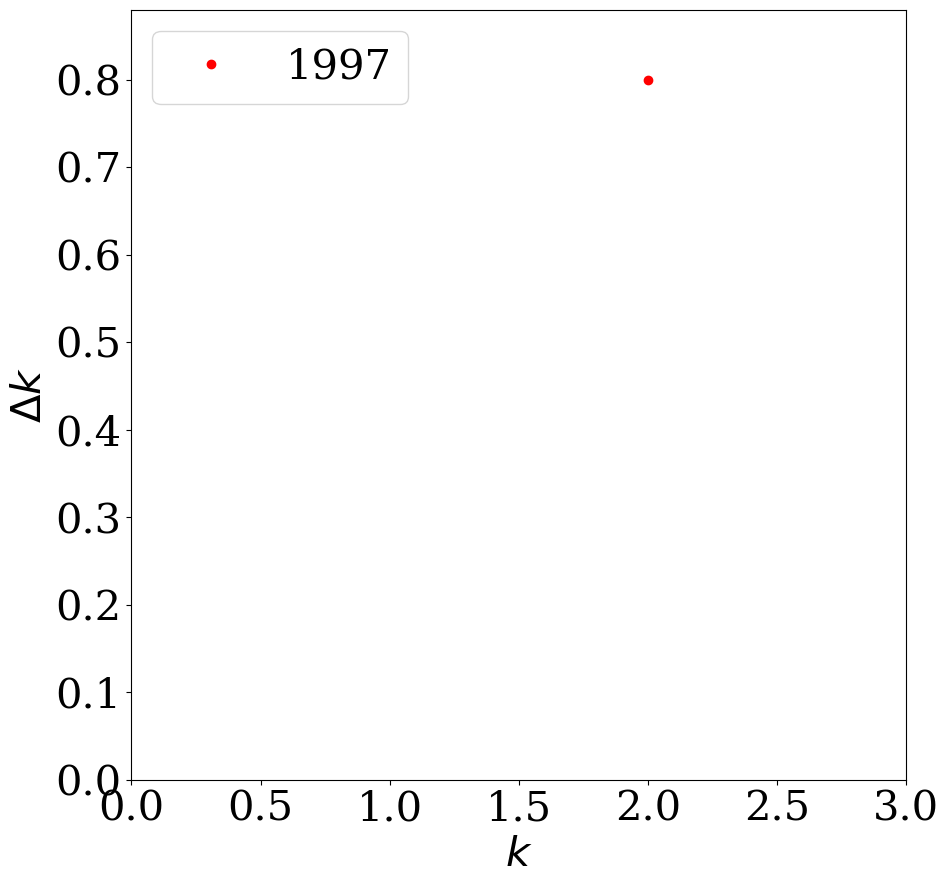

<Figure size 1000x1000 with 0 Axes>

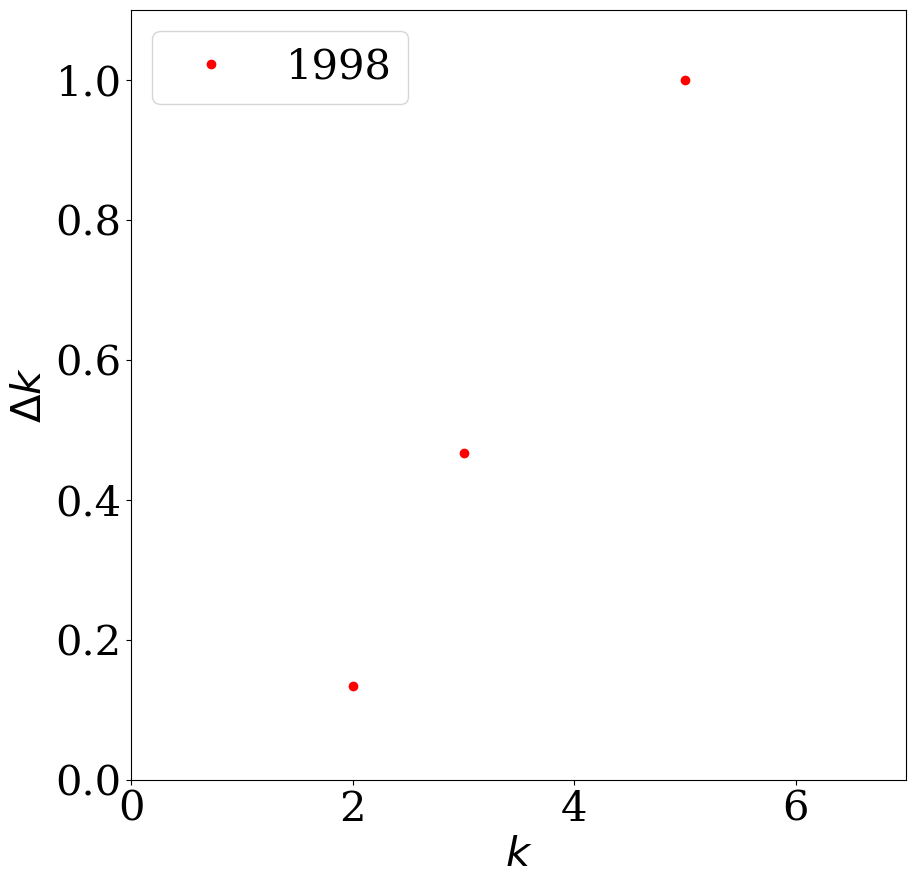

<Figure size 1000x1000 with 0 Axes>

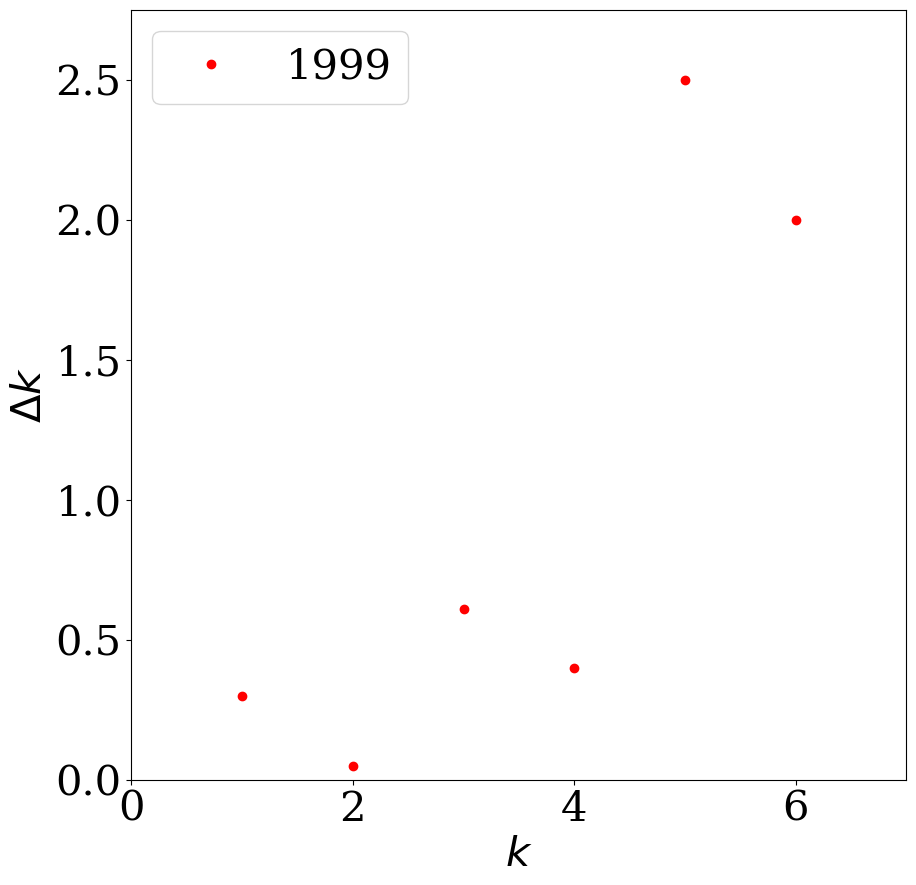

<Figure size 1000x1000 with 0 Axes>

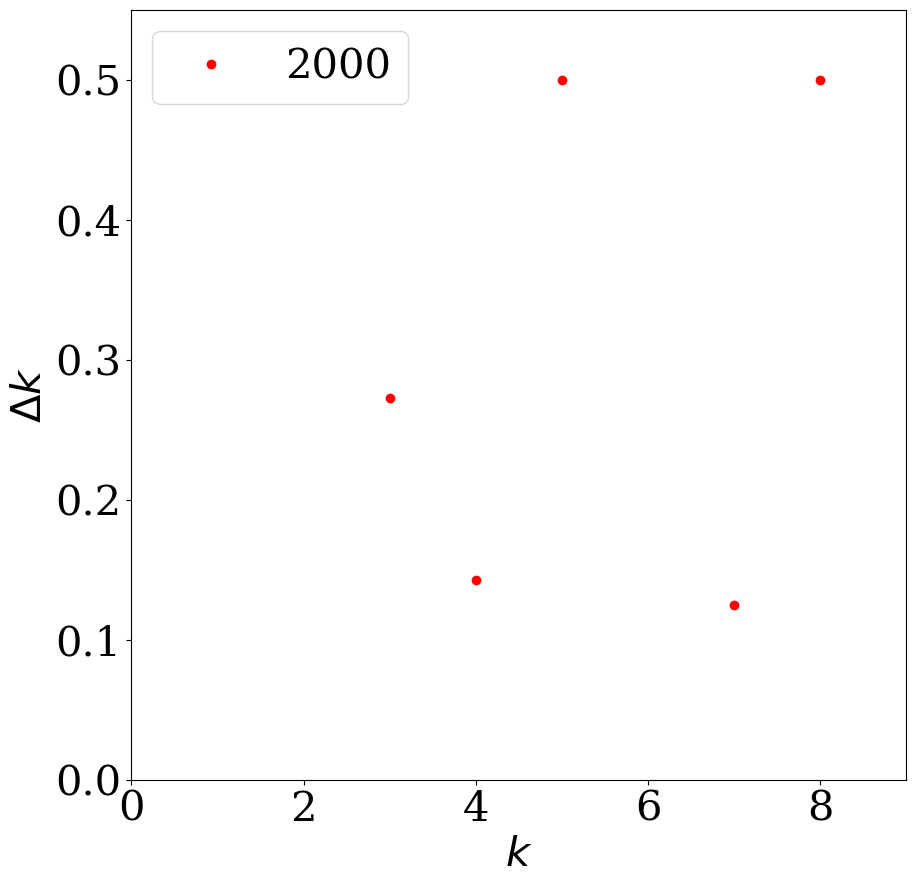

<Figure size 1000x1000 with 0 Axes>

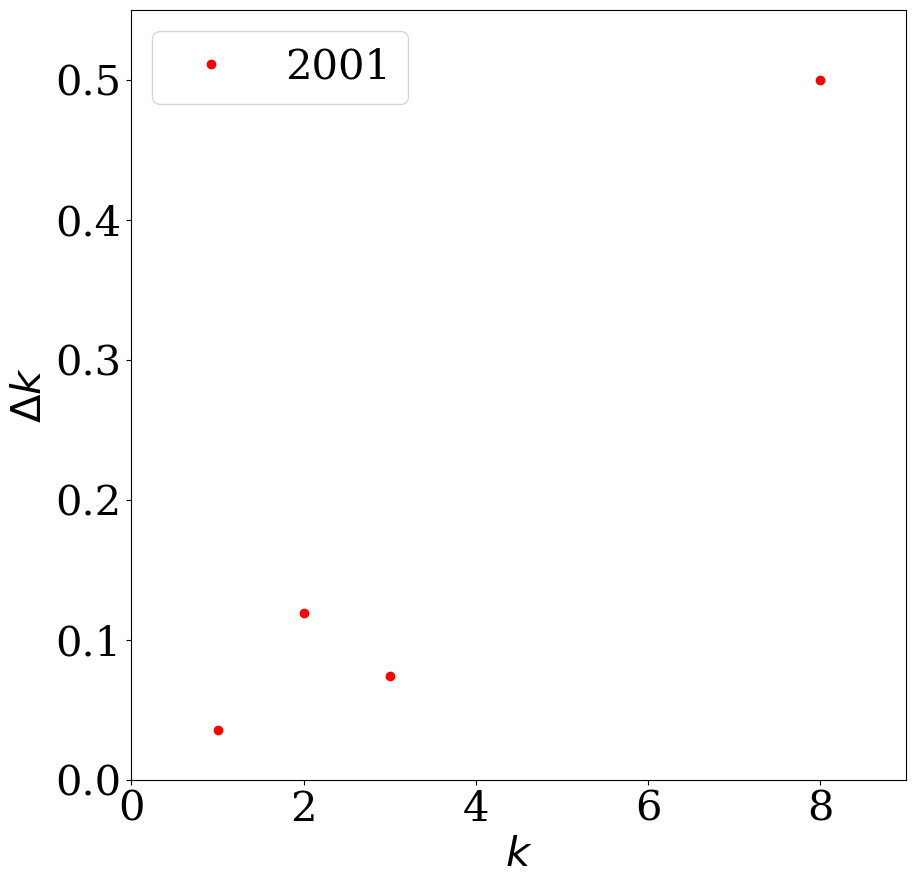

<Figure size 1000x1000 with 0 Axes>

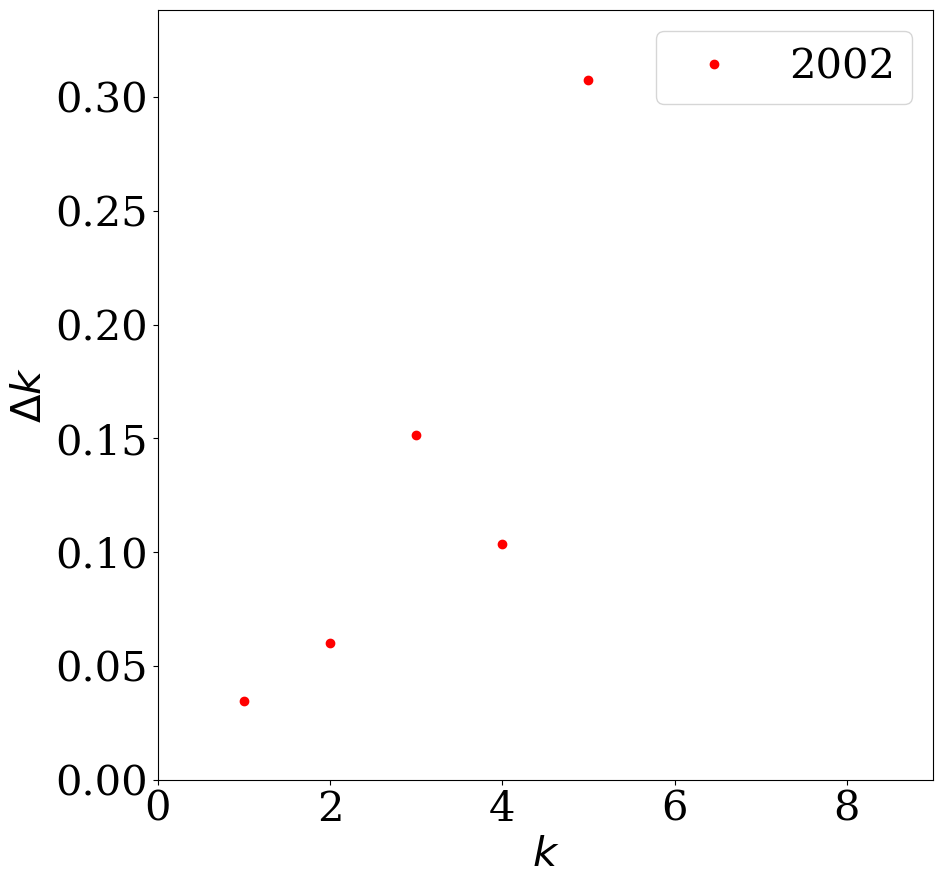

<Figure size 1000x1000 with 0 Axes>

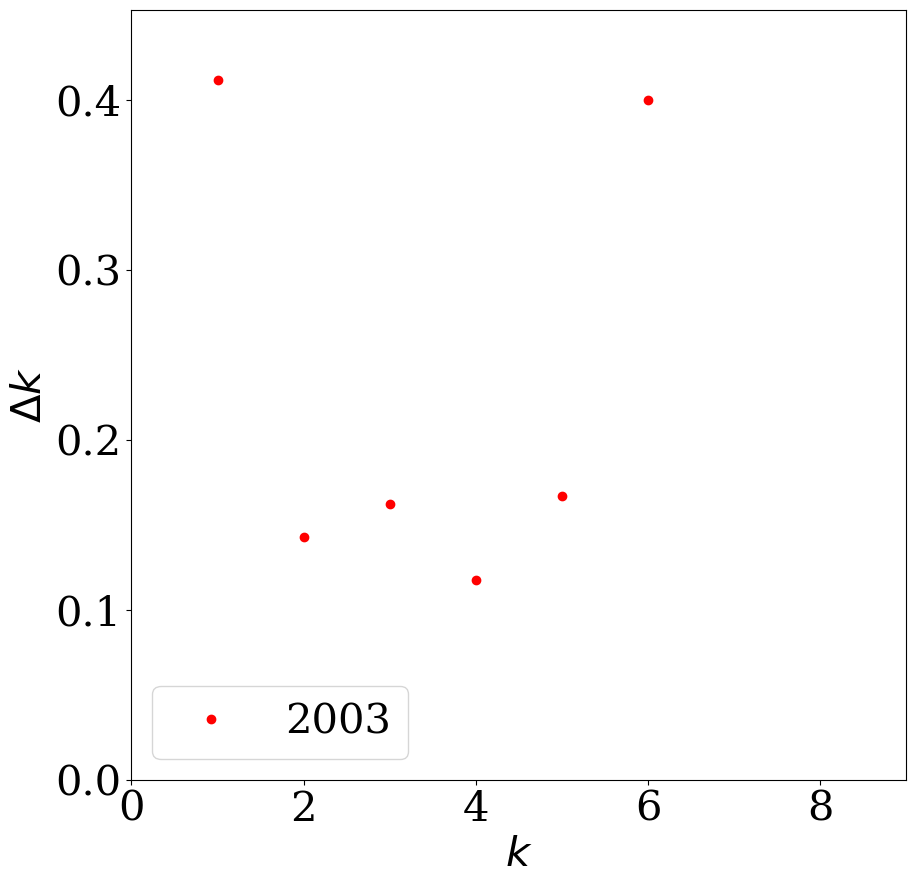

<Figure size 1000x1000 with 0 Axes>

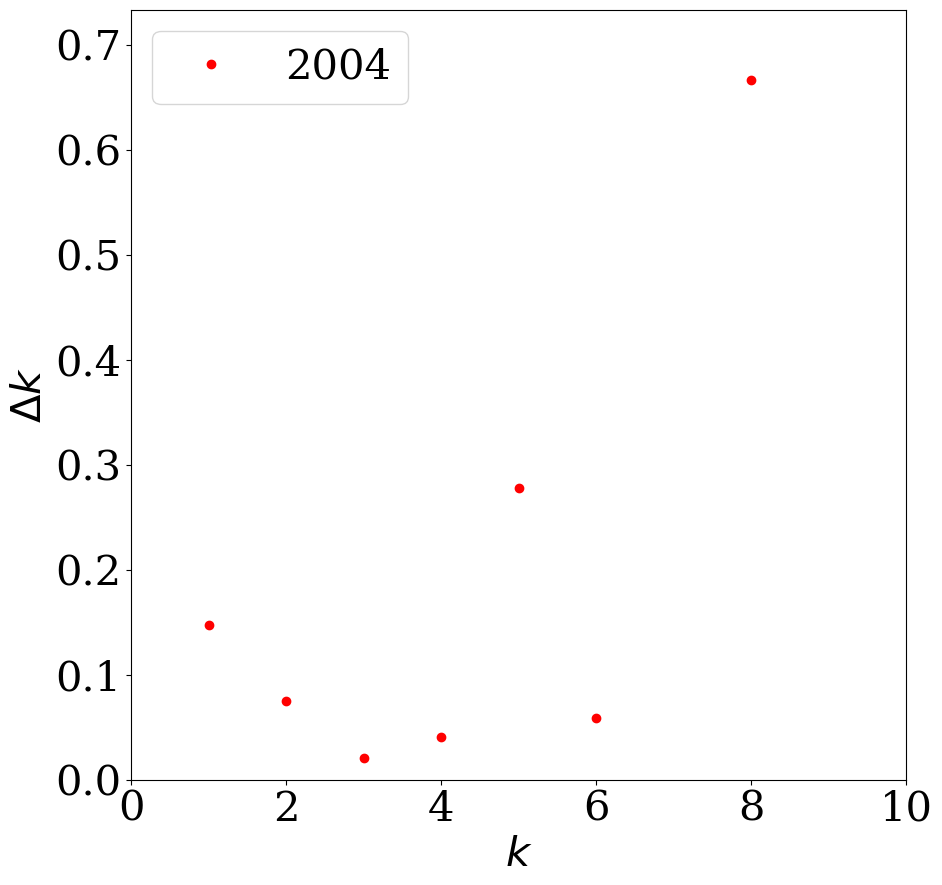

<Figure size 1000x1000 with 0 Axes>

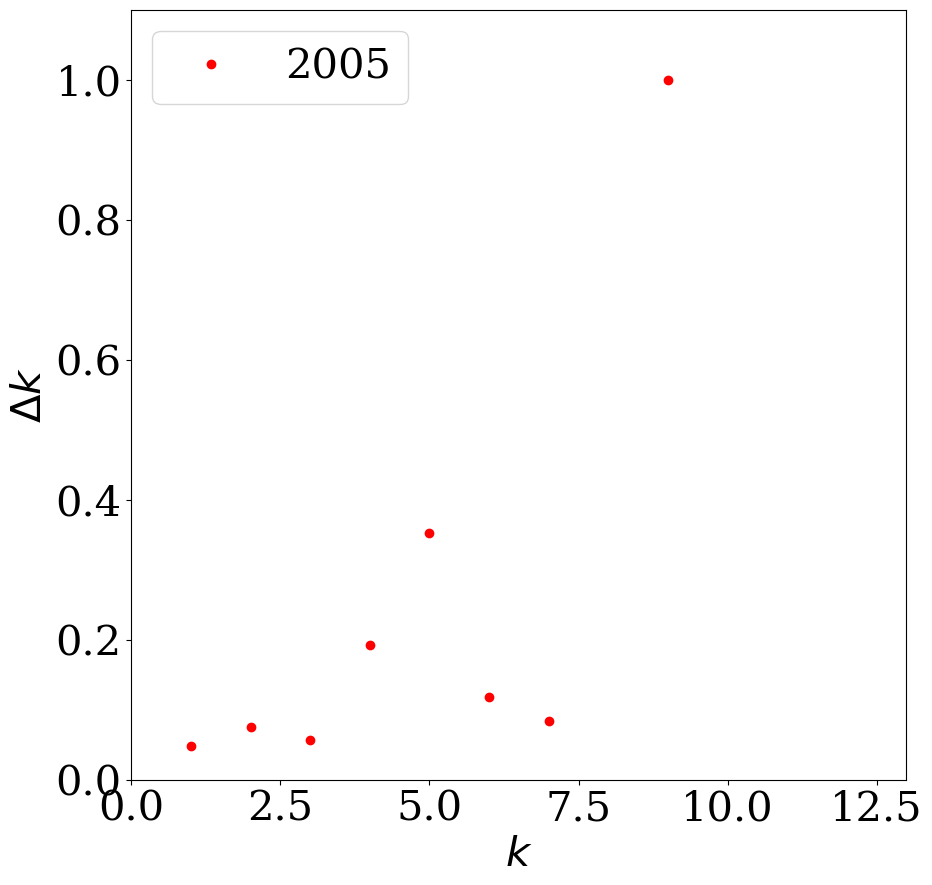

<Figure size 1000x1000 with 0 Axes>

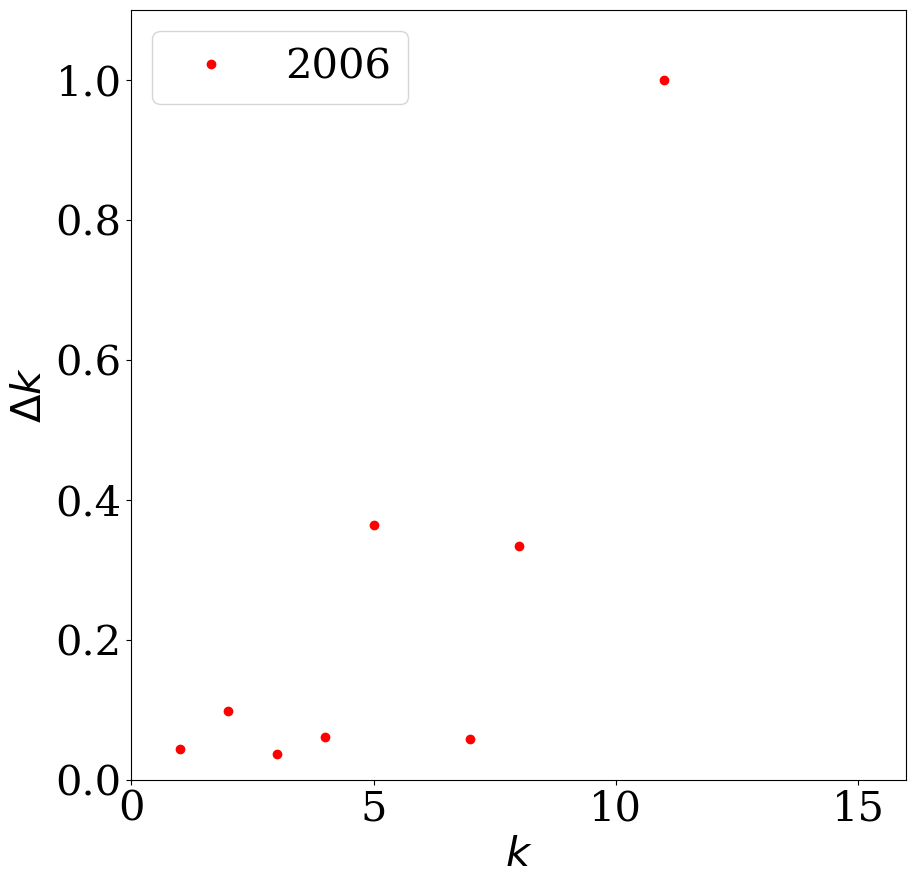

<Figure size 1000x1000 with 0 Axes>

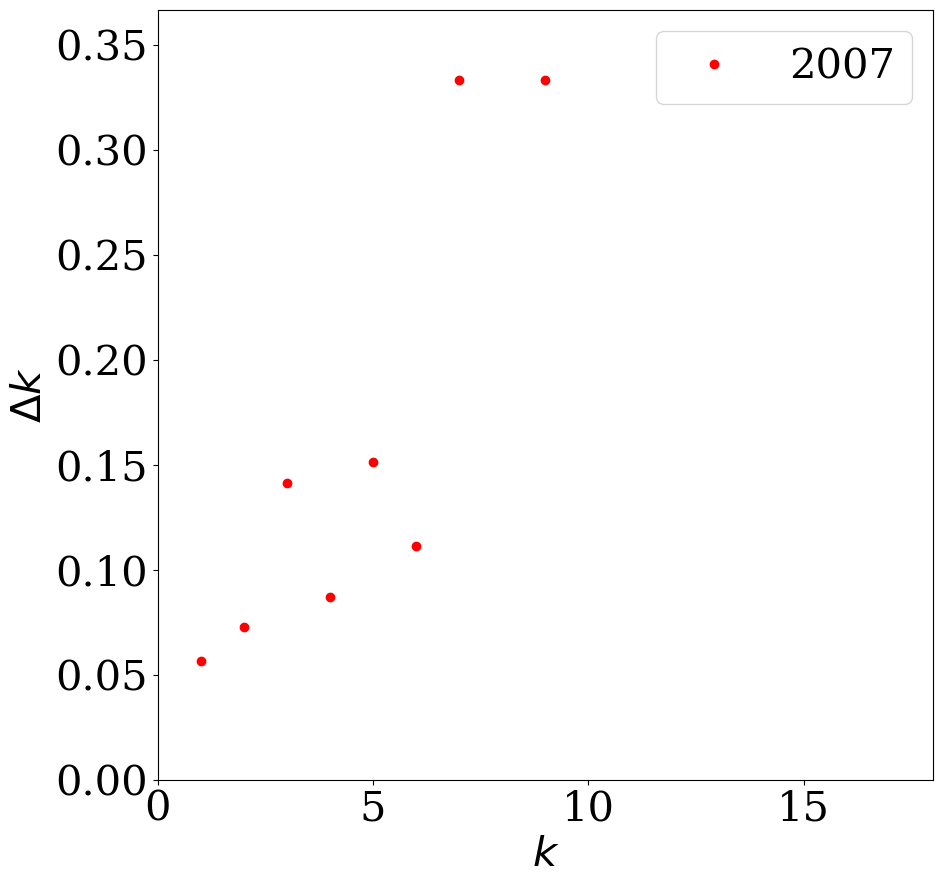

<Figure size 1000x1000 with 0 Axes>

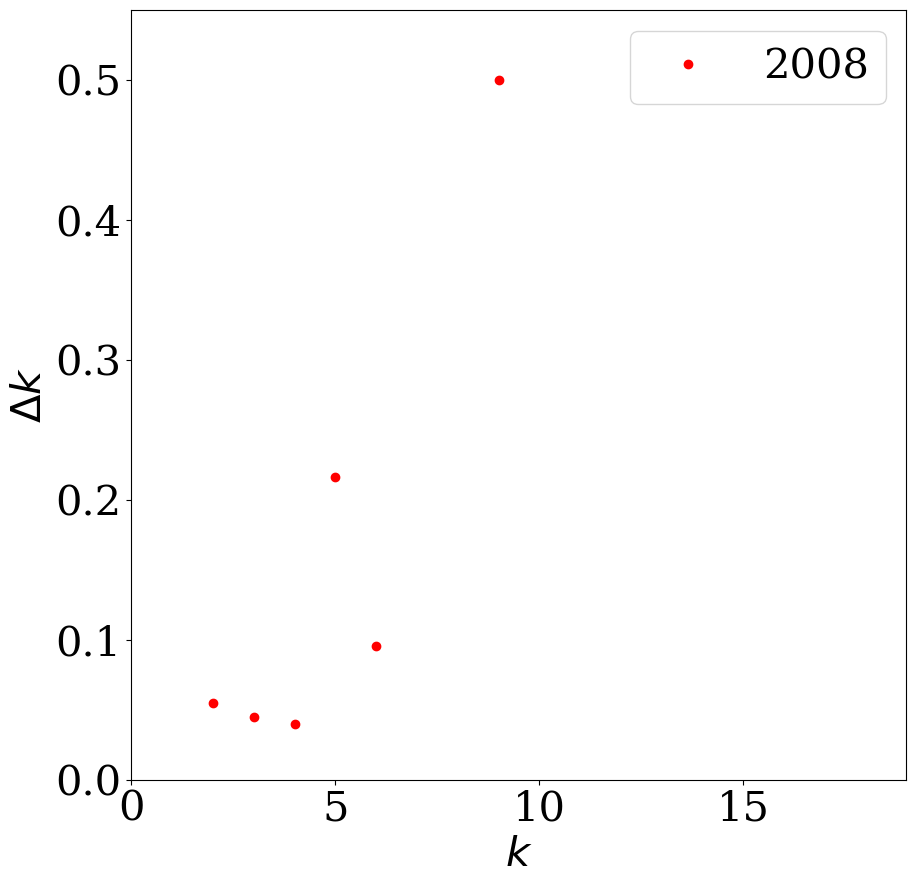

<Figure size 1000x1000 with 0 Axes>

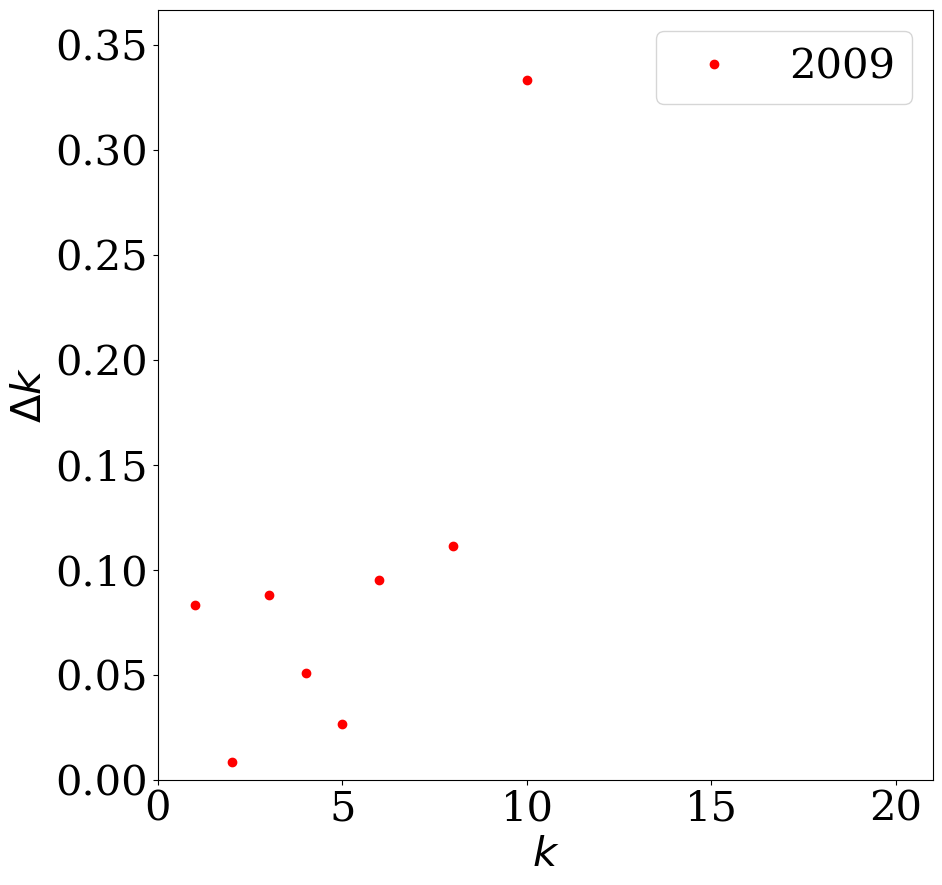

<Figure size 1000x1000 with 0 Axes>

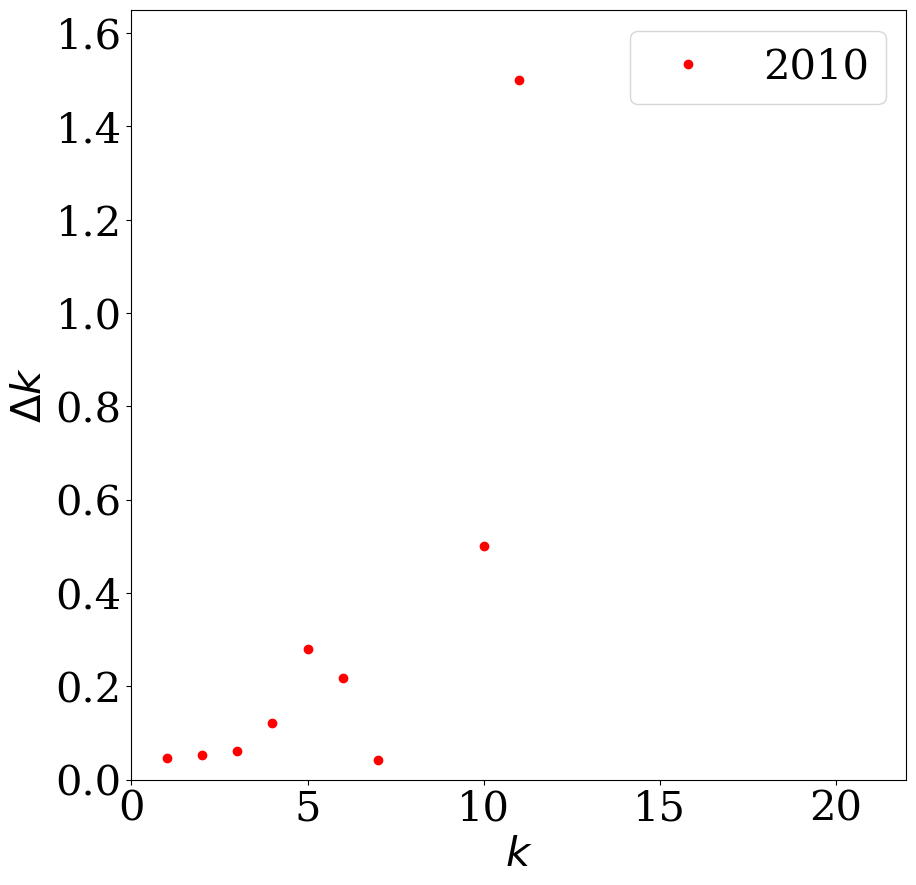

<Figure size 1000x1000 with 0 Axes>

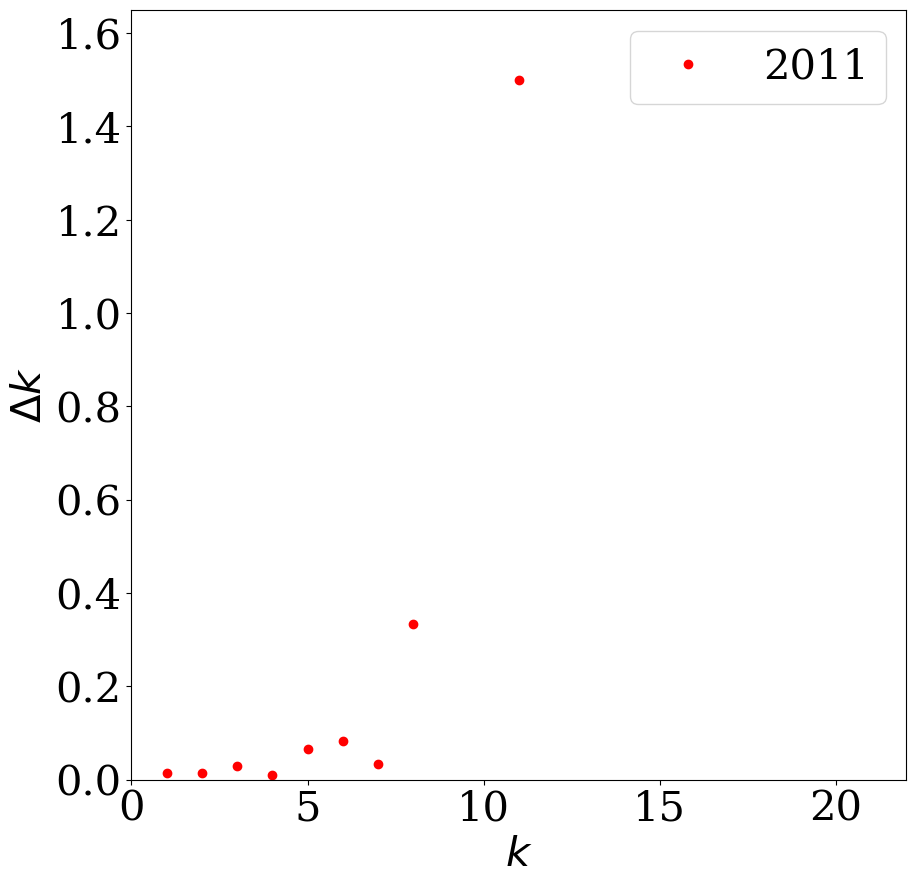

<Figure size 1000x1000 with 0 Axes>

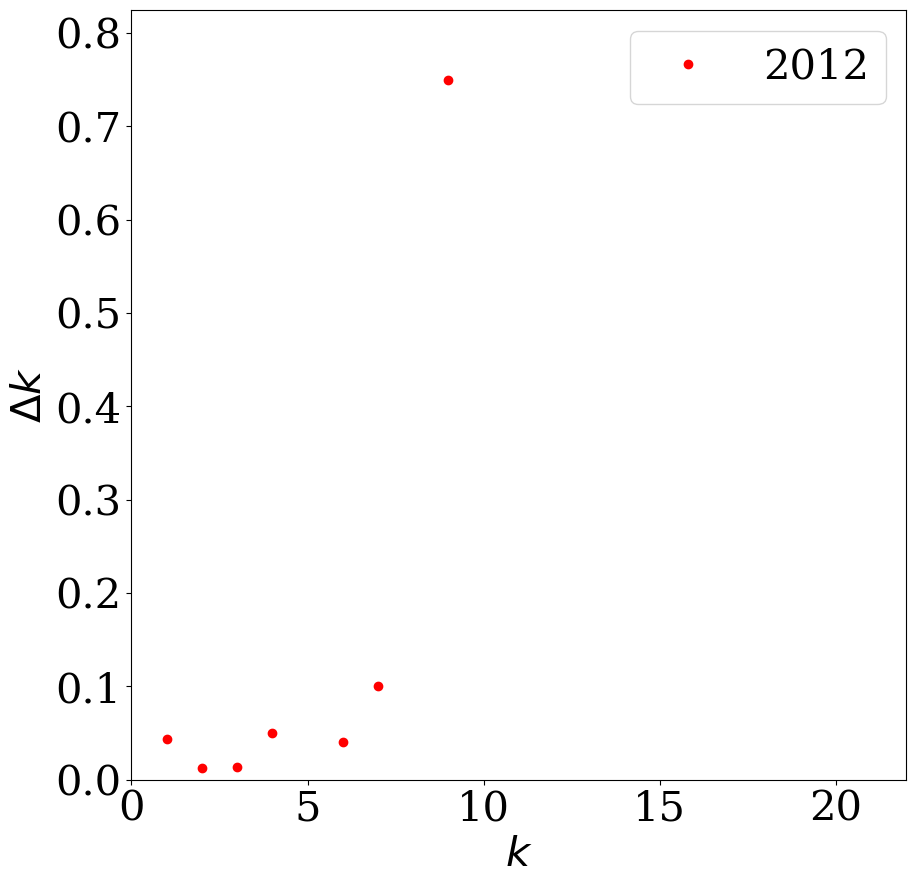

<Figure size 1000x1000 with 0 Axes>

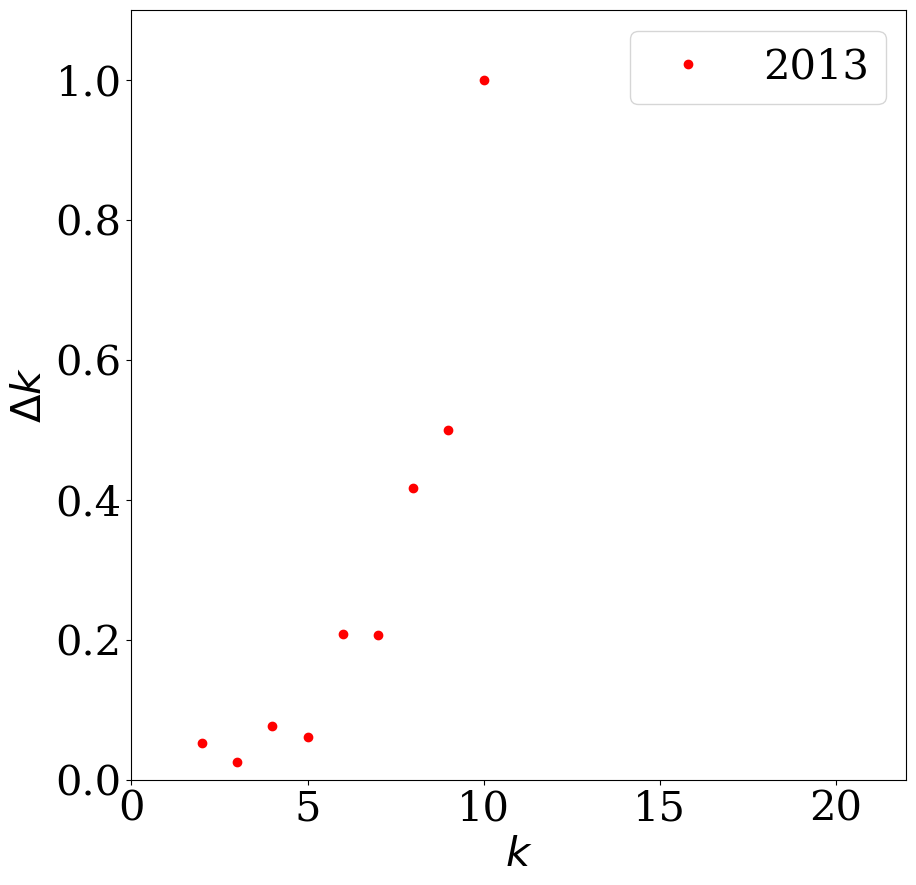

<Figure size 1000x1000 with 0 Axes>

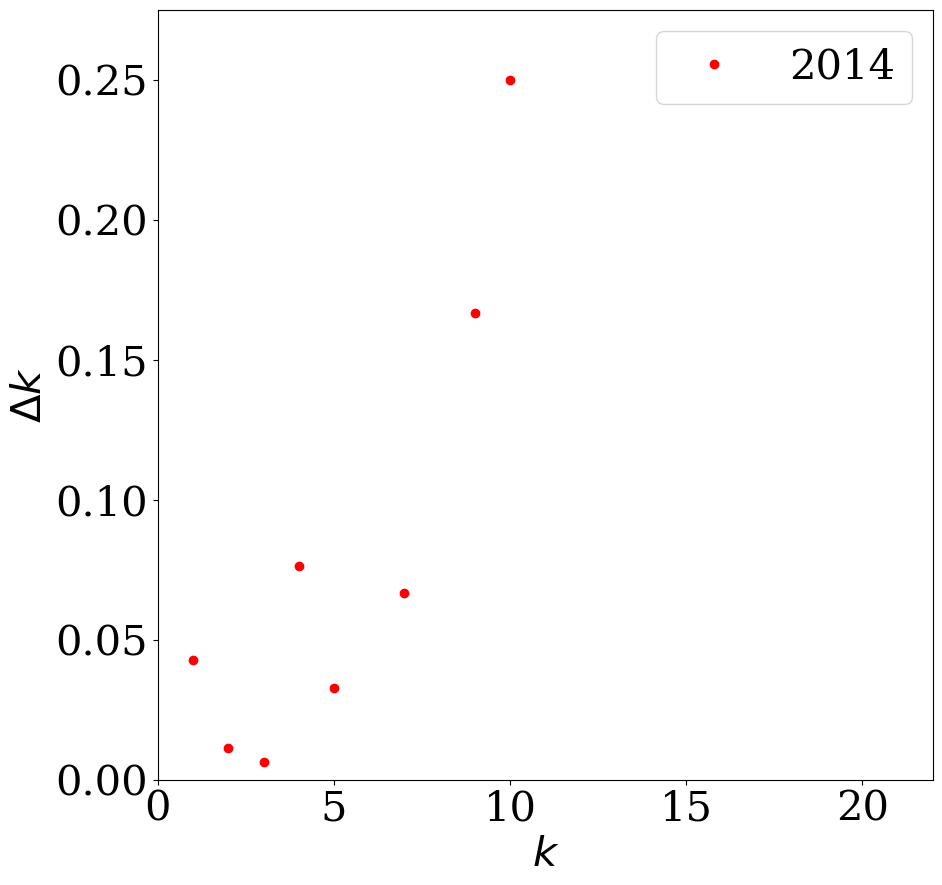

<Figure size 1000x1000 with 0 Axes>

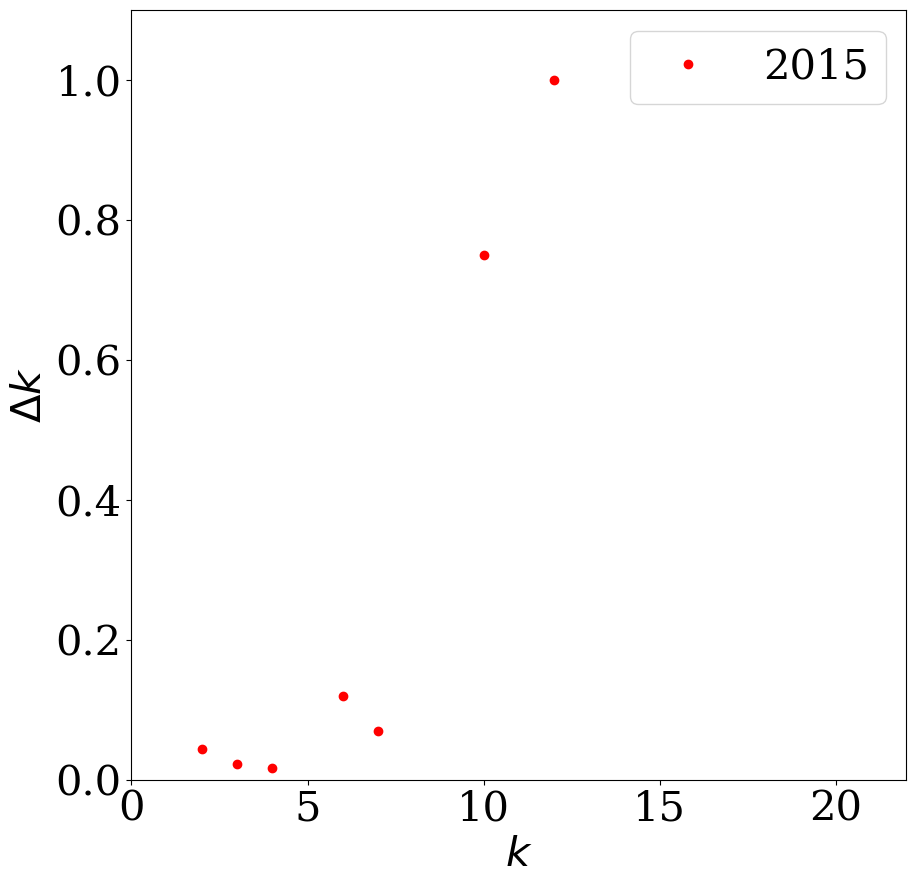

<Figure size 1000x1000 with 0 Axes>

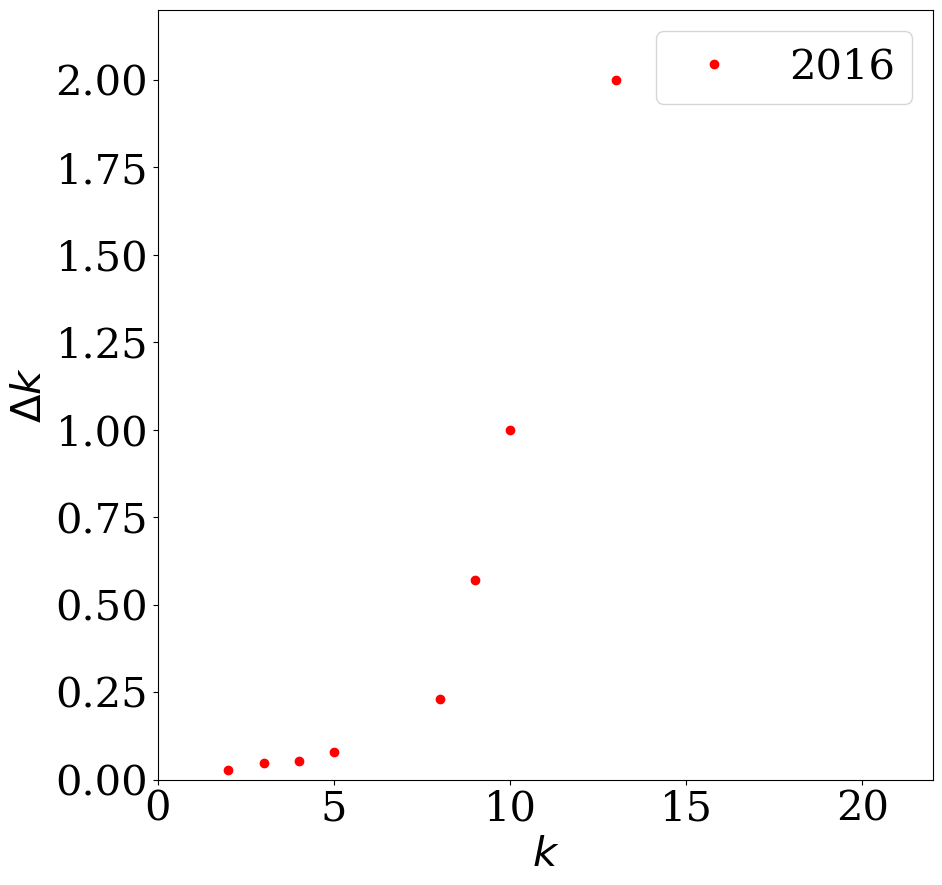

<Figure size 1000x1000 with 0 Axes>

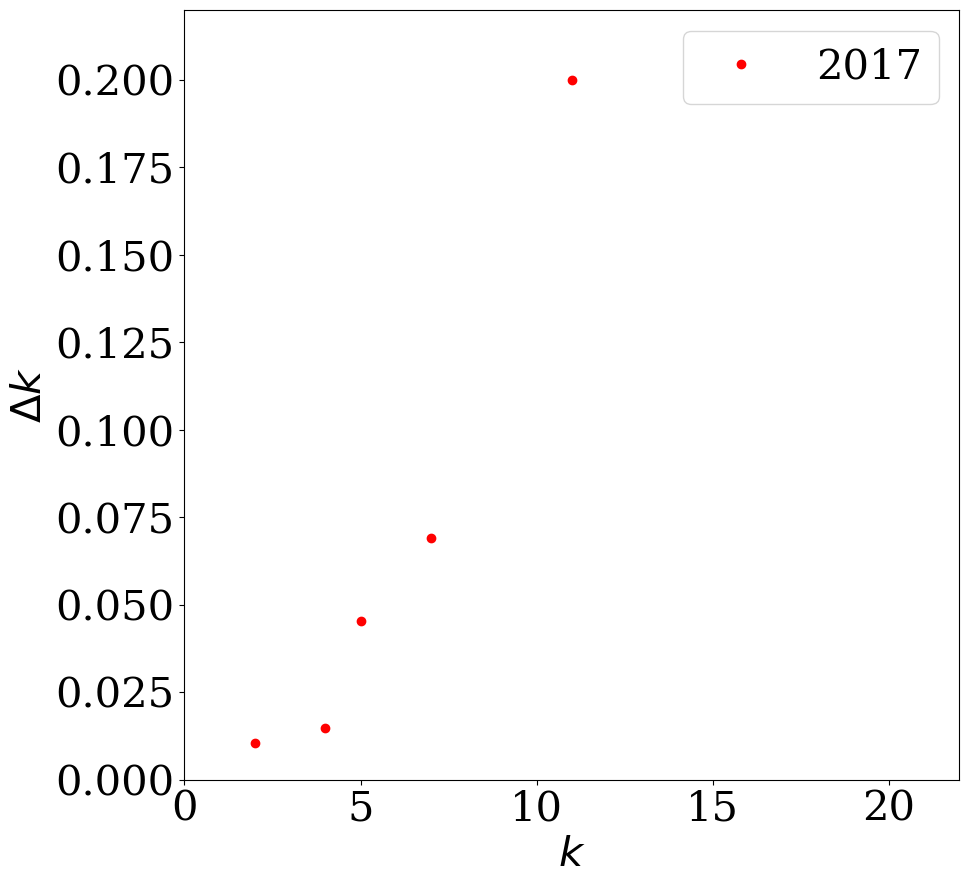

<Figure size 1000x1000 with 0 Axes>

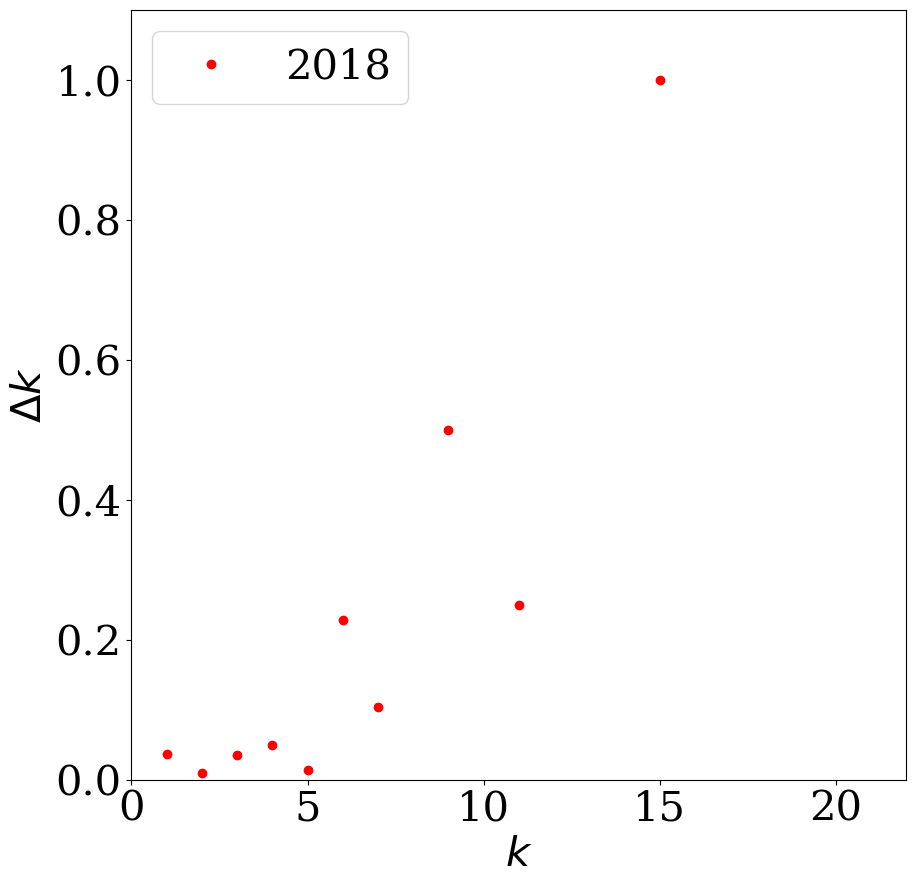

<Figure size 1000x1000 with 0 Axes>

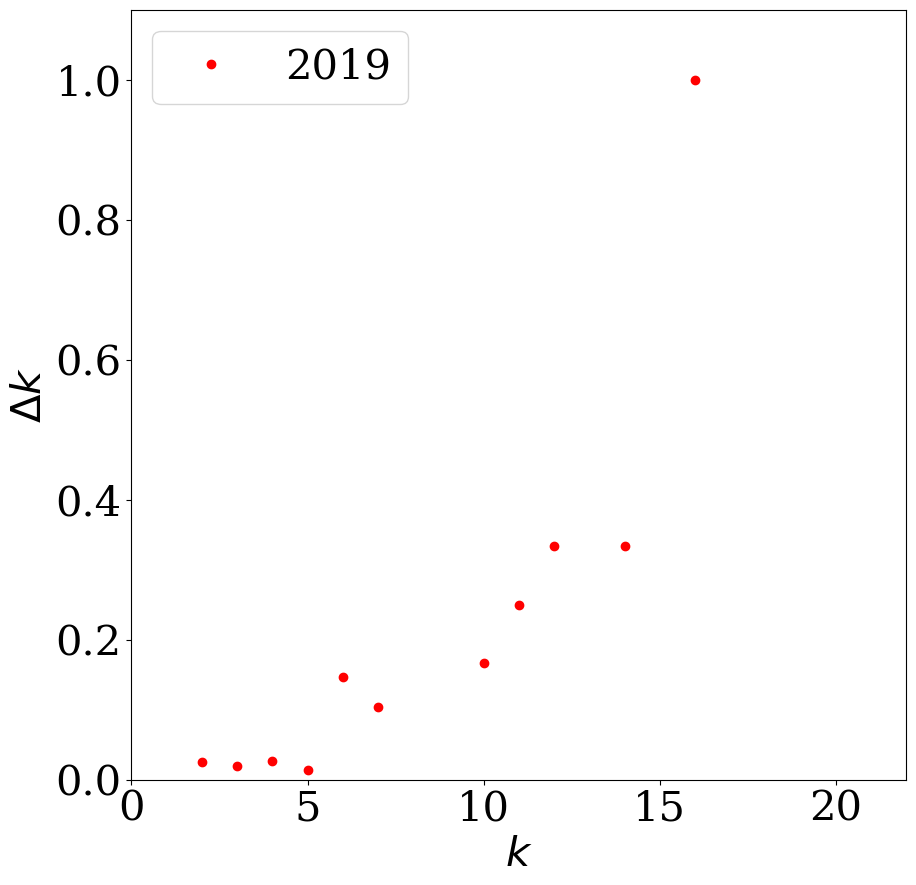

<Figure size 1000x1000 with 0 Axes>

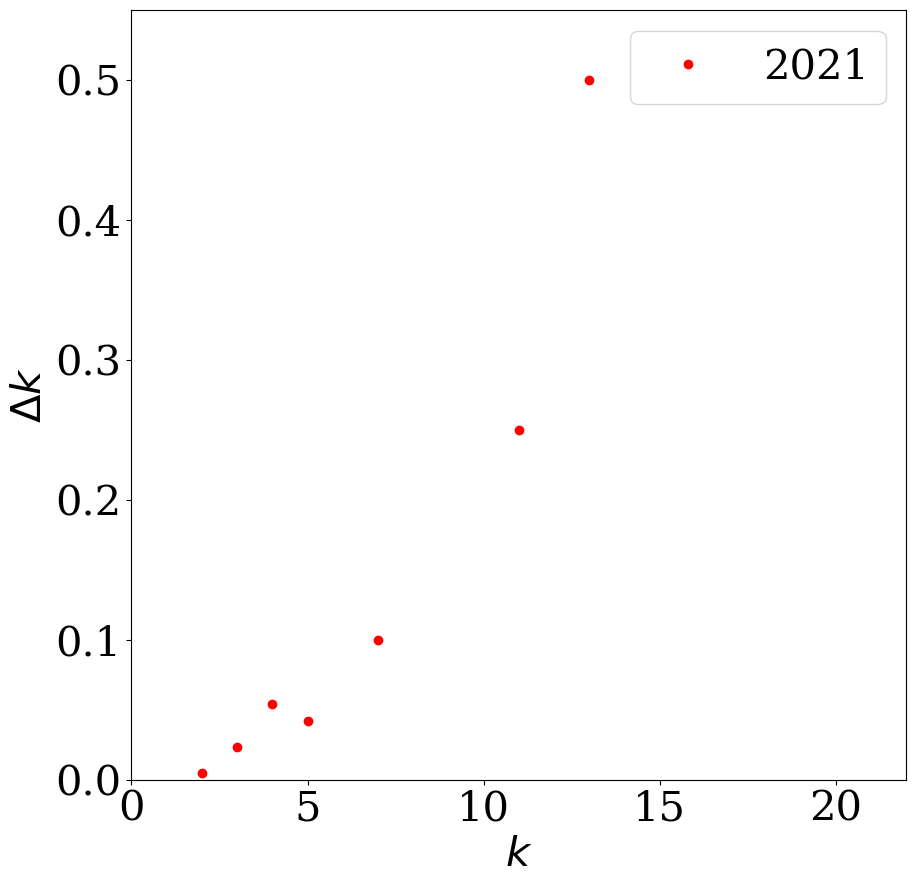

<Figure size 1000x1000 with 0 Axes>

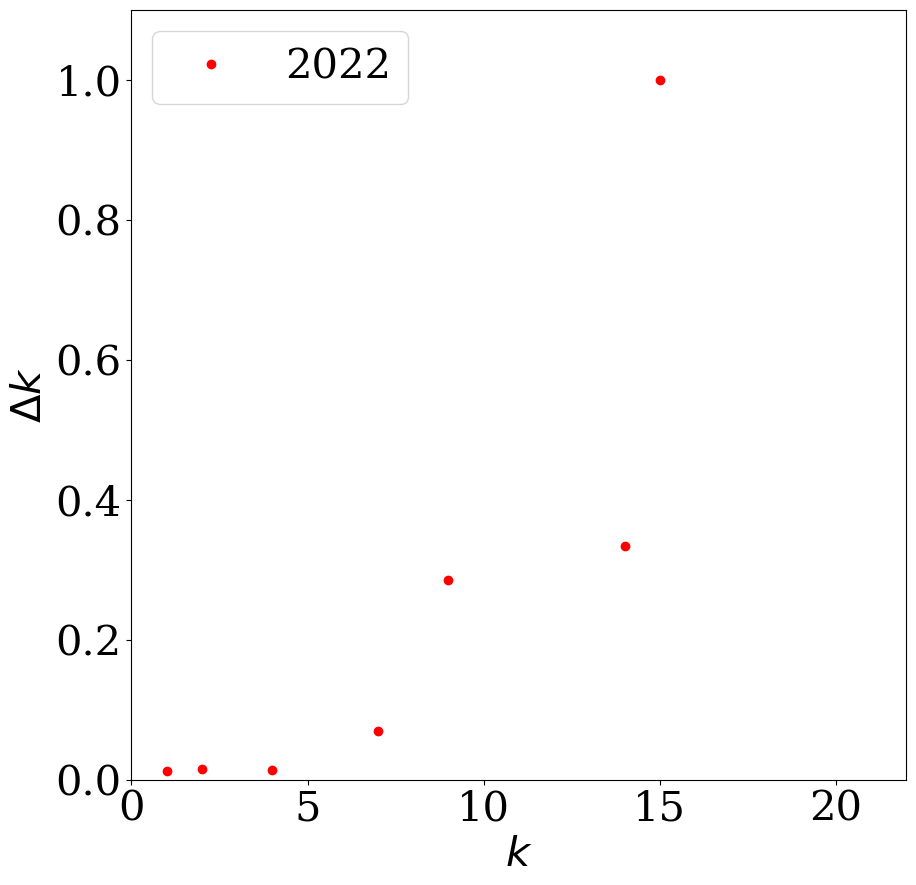

In [5]:
def max_x(x):
        if x[-1] <= 0:
            return max_x(x[:-1])
        return len(x)

for year in years[1:]:
    plt.rc('font', size=30)
    plt.figure(figsize=(10,10))
    x = attachments[year][0]
    y = attachments[year][1]
    plt.figure(figsize=(10,10))
    plt.plot(x,y,'or',label=year)
    plt.axis((0,max_x(x),0,max(y)+max(y)/10))
    plt.xlabel(f'$k$')
    plt.ylabel(f'$\Delta k$')
    plt.legend()
    plt.savefig('../../Figures/ciaa_attachment_'+str(year)+'.png')

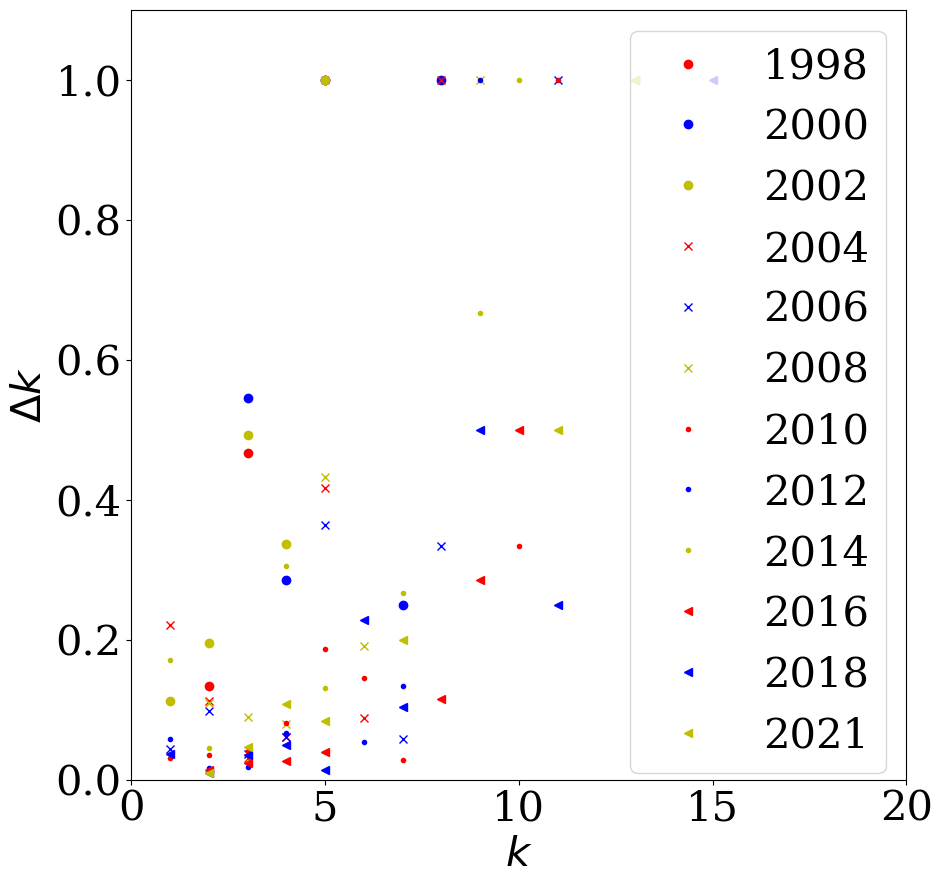

In [6]:
def normalize(l):
    return [i/max(l) for i in l]
years = [1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2021]
# styles = ['or','ob','og','oy','xr','xb','xg','xy','xr','xb','xg','xy','<r','<b','<g','<y']
styles = ['or','ob','oy','xr','xb','xy','.r','.b','.y','<r','<b','<y']
plt.figure(figsize=(10,10))
style = 0
for year in years:
    x = attachments[year][0]
    y = normalize(attachments[year][1])
    plt.plot(x,y,styles[style],label=year)
    style += 1
plt.axis((0,20,0,1.1))
plt.xlabel(f'$k$')
plt.ylabel(f'$\Delta k$')
plt.legend()
plt.savefig('../../Figures/ciaa_attachment_normalized.png')


### DCFS

In [7]:
import pandas as pd, networkx as nx, matplotlib.pyplot as plt, numpy as np, community

dcfs = pd.read_csv('../data/cleaned/DCFS-DCFS_m2.csv', sep=';')

dcfs_dynamic = [dcfs.loc[dcfs['Year']<=year] for year in range(2001,2023)]

years = [i for i in range(2001,2023)]
print(years)

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [8]:
dcfs_graphs = {}
year = 2001
for conference in dcfs_dynamic:
    authors = conference['Author'].to_list()
    co_authors = conference['Co-Authors'].to_list()    
    G = nx.Graph()
    G.add_nodes_from(set(authors))

    for i in range(len(authors)):    
        entries = co_authors[i].replace('[','').replace(']','').replace('"','').replace("'",'') 
        if entries != '':
            entries = entries.split(', ')
            for entry in entries:
                G.add_edge(authors[i],entry)
    dcfs_graphs[year] = G
    year += 1

In [9]:
dcfs_attachments = {}
for year in years[1:]:
    present = dcfs_graphs[year]
    previous = dcfs_graphs[year-1]
    old_nodes = set(list(previous.nodes()))
    #new_nodes = set(list(present.nodes()))-old_nodes
    old_degree = {node: previous.degree(node) for node in old_nodes}
    new_degree = {node: present.degree(node) for node in old_nodes}
    delta_degree = {node: new_degree[node]-old_degree[node] for node in old_nodes}
    
    values = []
    for i in range(max(old_degree.values())):
        values.append([key for key, value in old_degree.items() if value == i])
    deltas = []
    for entry in values:
        deltas.append([delta_degree[node] for node in entry])
    deltas_mean = [sum(entry)/len(entry) if len(entry) != 0 and sum(entry) != 0 else -1 for entry in deltas]
    dcfs_attachments[year] = ((np.linspace(1,max(old_degree.values()),max(old_degree.values())), deltas_mean))


In [10]:
data_dict = {i:[] for i in range(1,28)}
for attachment in dcfs_attachments.values():
    for i in range(len(attachment[1])):
        if attachment[1][i] != -1:
            data_dict[i+1].append(attachment[1][i])
data_dict = {key: sum(value)/len(value) if value != [] else 0 for key,value in data_dict.items()}
x, y = zip(*data_dict.items())

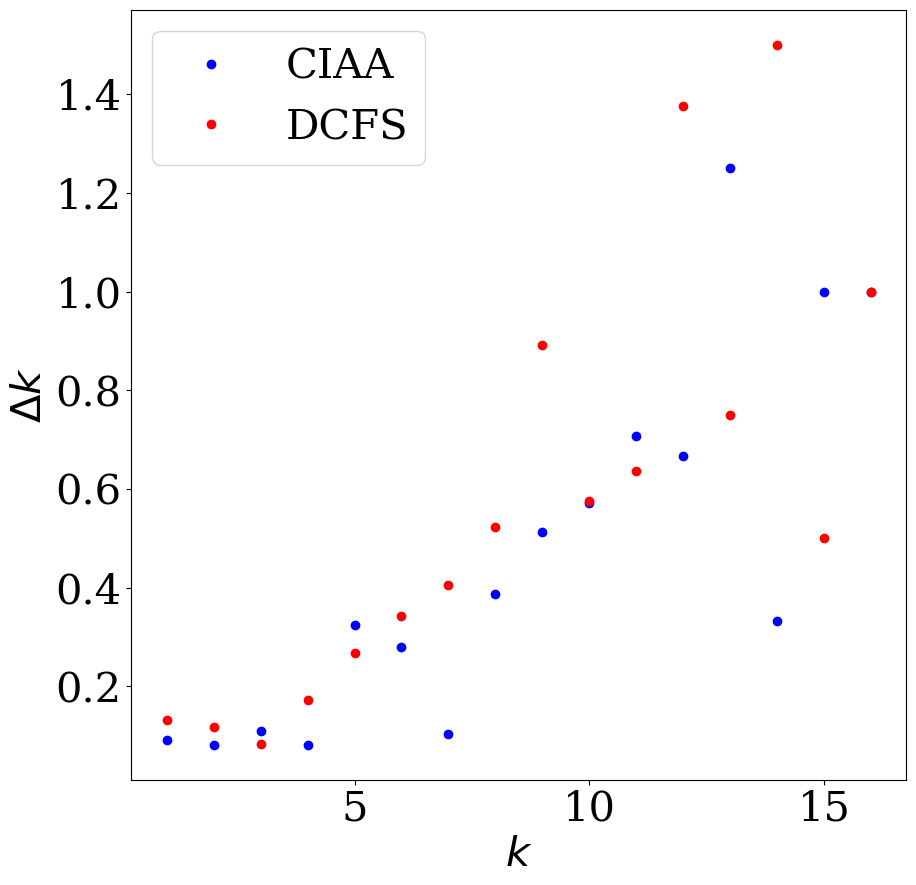

In [11]:
plt.figure(figsize=(10,10))
plt.plot(x_coords[:-6],y_coords[:-6],'ob',label='CIAA')
plt.plot(x[:-11],y[:-11],'or',label='DCFS')
plt.legend()
plt.xlabel(f'$k$')
plt.ylabel(f'$\Delta k$')

plt.savefig('../../Figures/external_attachment.png',bbox_inches='tight')

In [12]:
kappa = {}
for i in range(len(x[:-11])):
    res = 0
    for j in range(i+1):
        res += y[j]
    kappa[x[i]] = res

x1,x2 = zip(*kappa.items())

kappa2 = {}
for i in range(len(x_coords[:-6])):
    res = 0
    for j in range(i+1):
        res += y_coords[j]
    kappa2[x_coords[i]] = res

y1,y2 = zip(*kappa2.items())

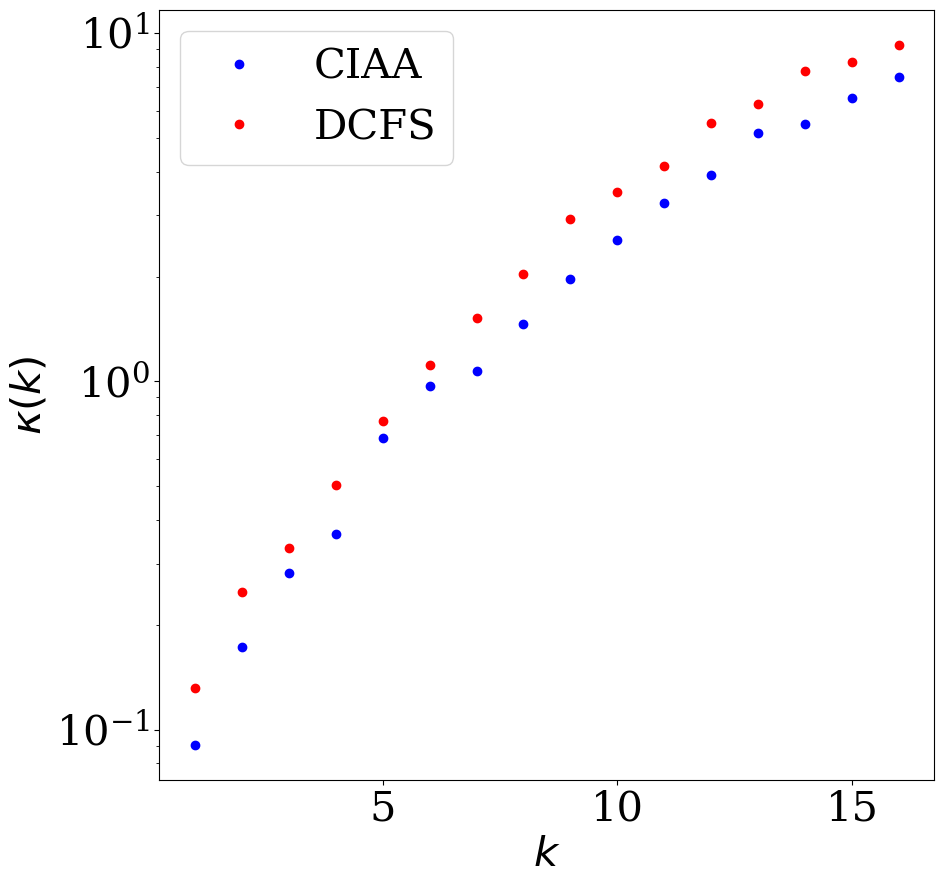

In [13]:
plt.figure(figsize=(10,10))
plt.plot(y1,y2,'ob',label='CIAA')
plt.plot(x1,x2,'or',label='DCFS')
plt.yscale('log')
plt.legend()
plt.xlabel(f'$k$')
plt.ylabel(f'$\kappa(k)$')

plt.savefig('../../Figures/external_attachment_cumulated.png',bbox_inches='tight')

In [14]:
print(kappa)
print(kappa2)

{1: 0.13165147628245027, 2: 0.2489283991188915, 3: 0.33272073501621585, 4: 0.5046522794267414, 5: 0.7719838846184872, 6: 1.1139151015497042, 7: 1.5193714507560534, 8: 2.0415575979422007, 9: 2.9332242646088673, 10: 3.5094147407993432, 11: 4.14608140746601, 12: 5.52108140746601, 13: 6.27108140746601, 14: 7.77108140746601, 15: 8.27108140746601, 16: 9.27108140746601}
{1: 0.09054180124016732, 2: 0.17264139144209595, 3: 0.28227867203019075, 4: 0.36412863057074196, 5: 0.6889452671400298, 6: 0.9691414180641675, 7: 1.0734078142778254, 8: 1.4598928570128682, 9: 1.97179761891763, 10: 2.5432261903462017, 11: 3.250369047489059, 12: 3.9170357141557255, 13: 5.167035714155725, 14: 5.500369047489058, 15: 6.500369047489058, 16: 7.500369047489058}


/var/folders/68/zr6z7wd56pl2hspyj9v4d57m0000gn/T/ipykernel_21747/1204966174.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,10))


<Figure size 1000x1000 with 0 Axes>

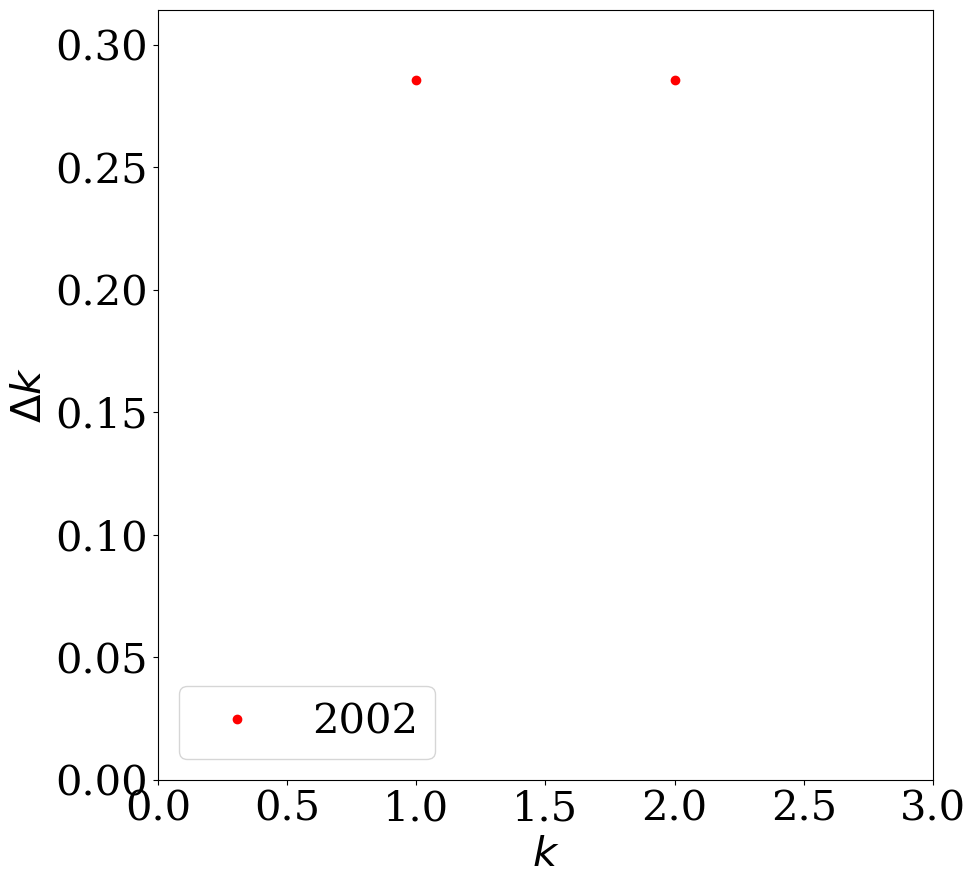

<Figure size 1000x1000 with 0 Axes>

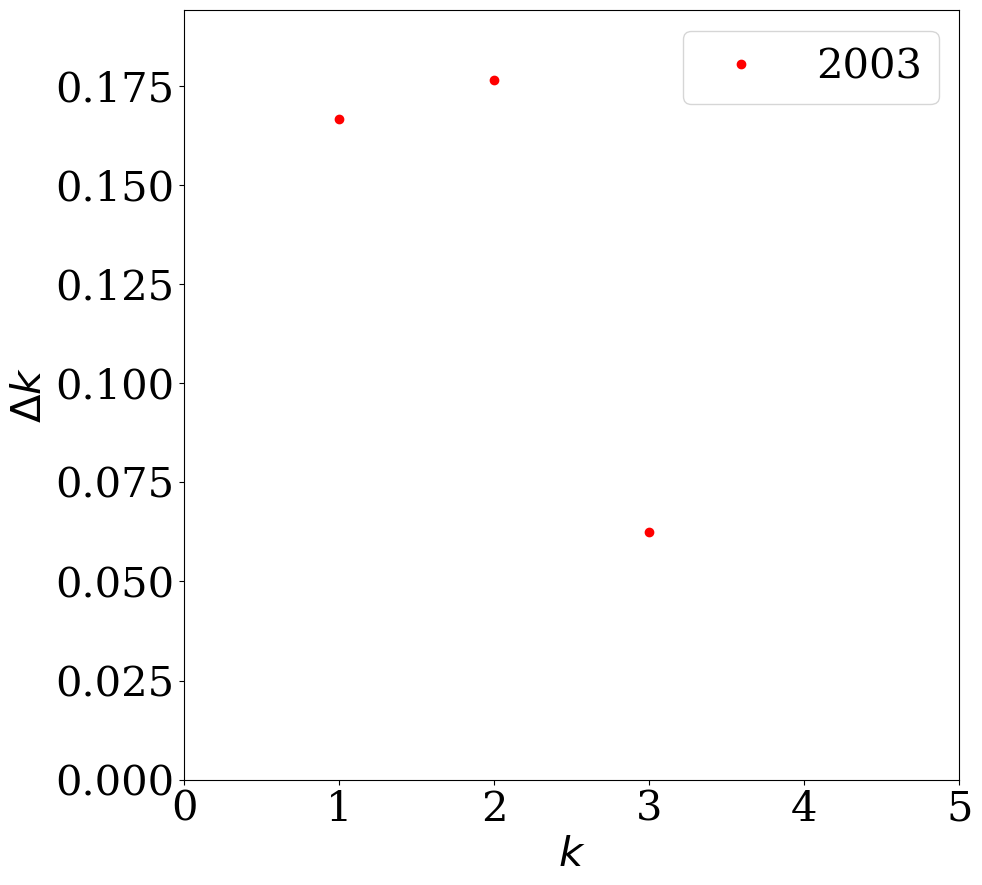

<Figure size 1000x1000 with 0 Axes>

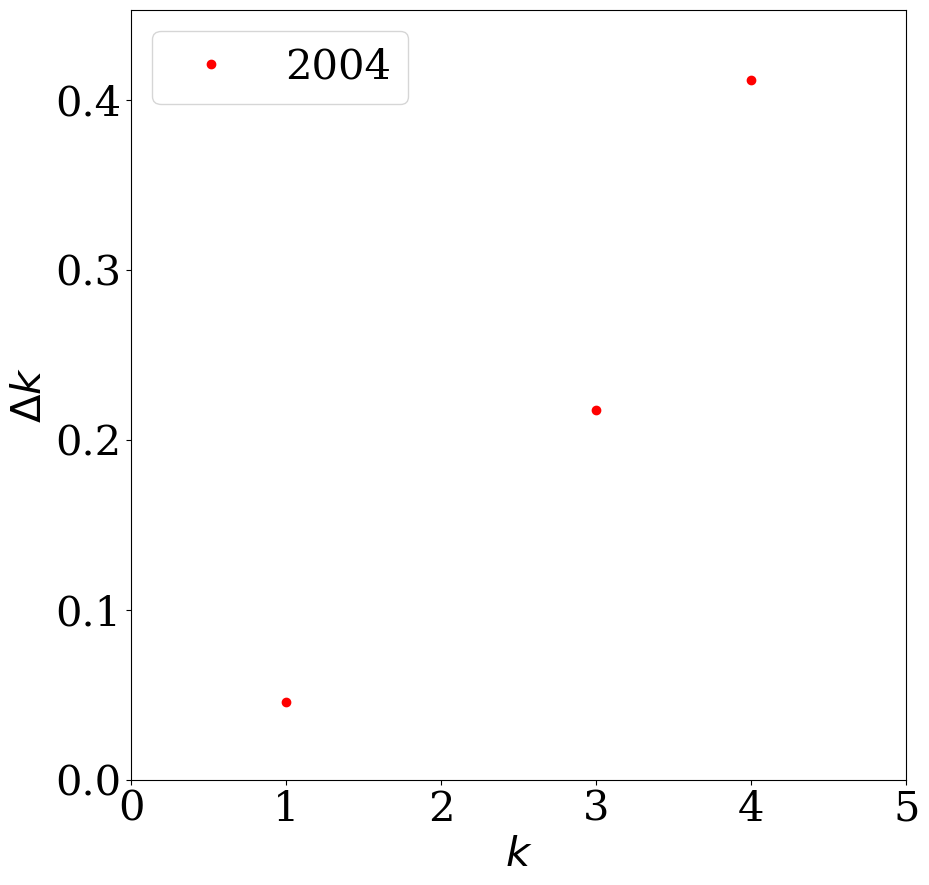

<Figure size 1000x1000 with 0 Axes>

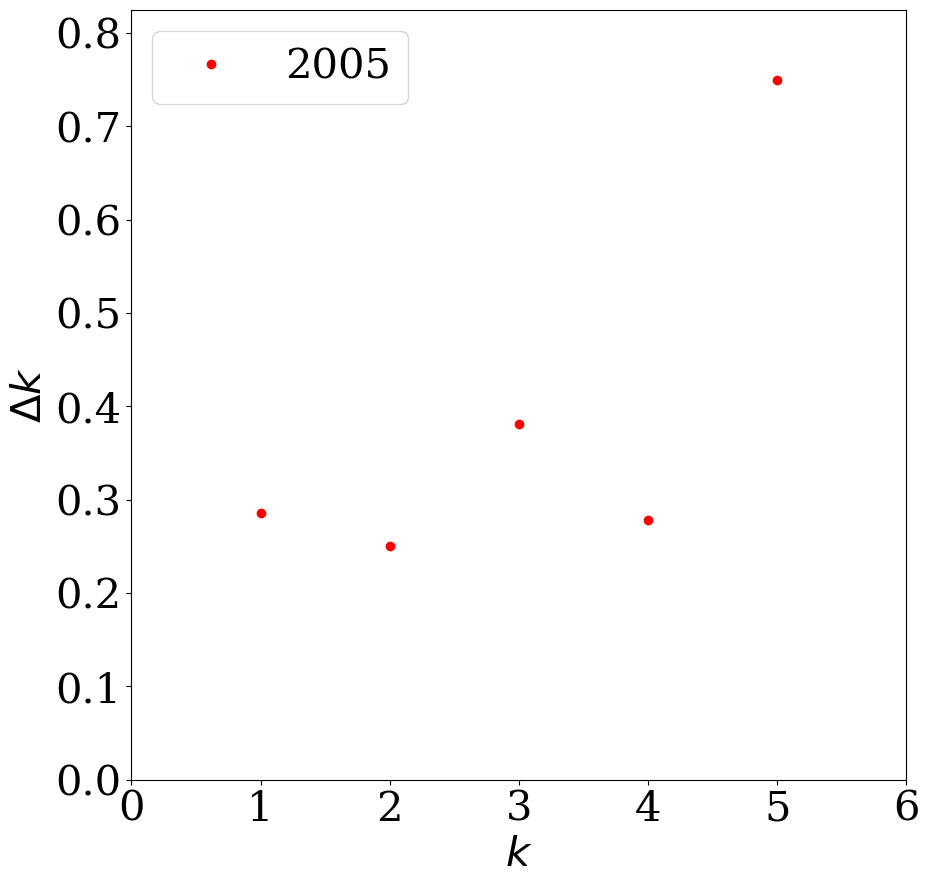

<Figure size 1000x1000 with 0 Axes>

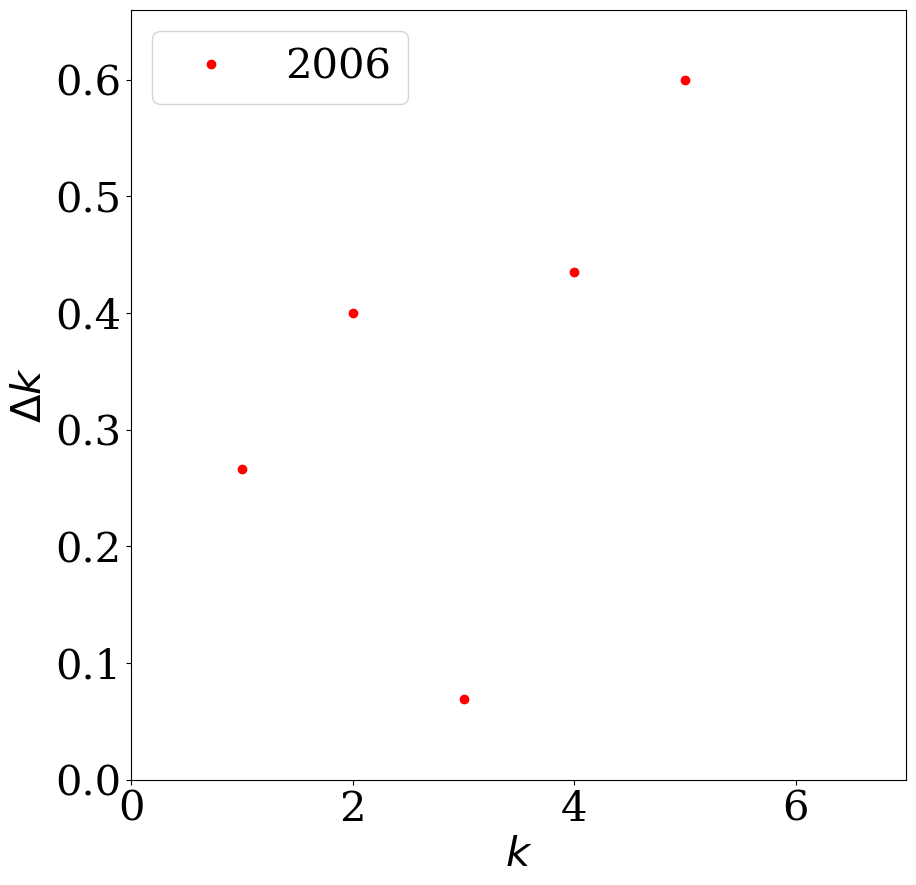

<Figure size 1000x1000 with 0 Axes>

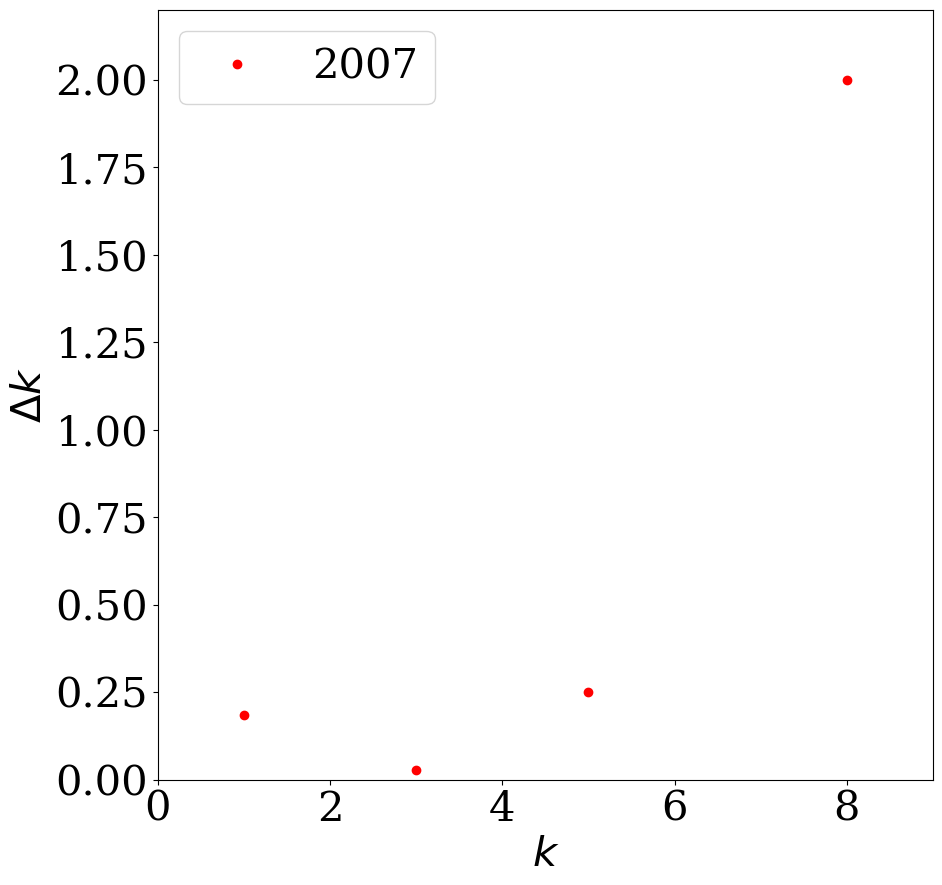

<Figure size 1000x1000 with 0 Axes>

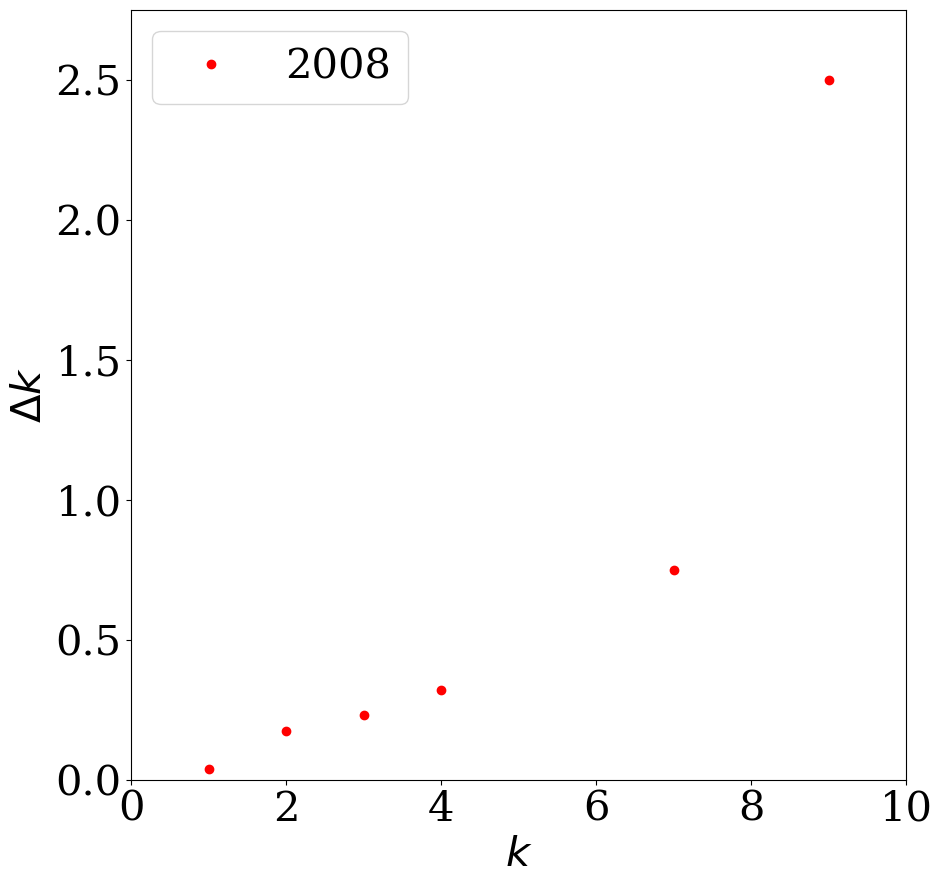

<Figure size 1000x1000 with 0 Axes>

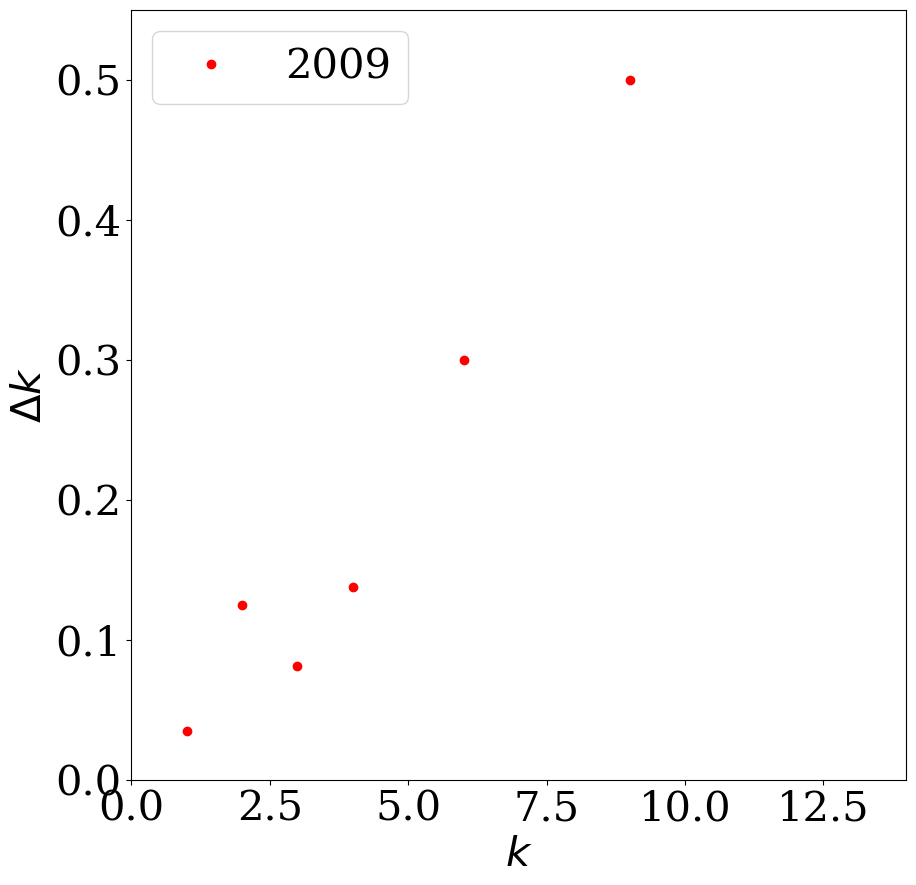

<Figure size 1000x1000 with 0 Axes>

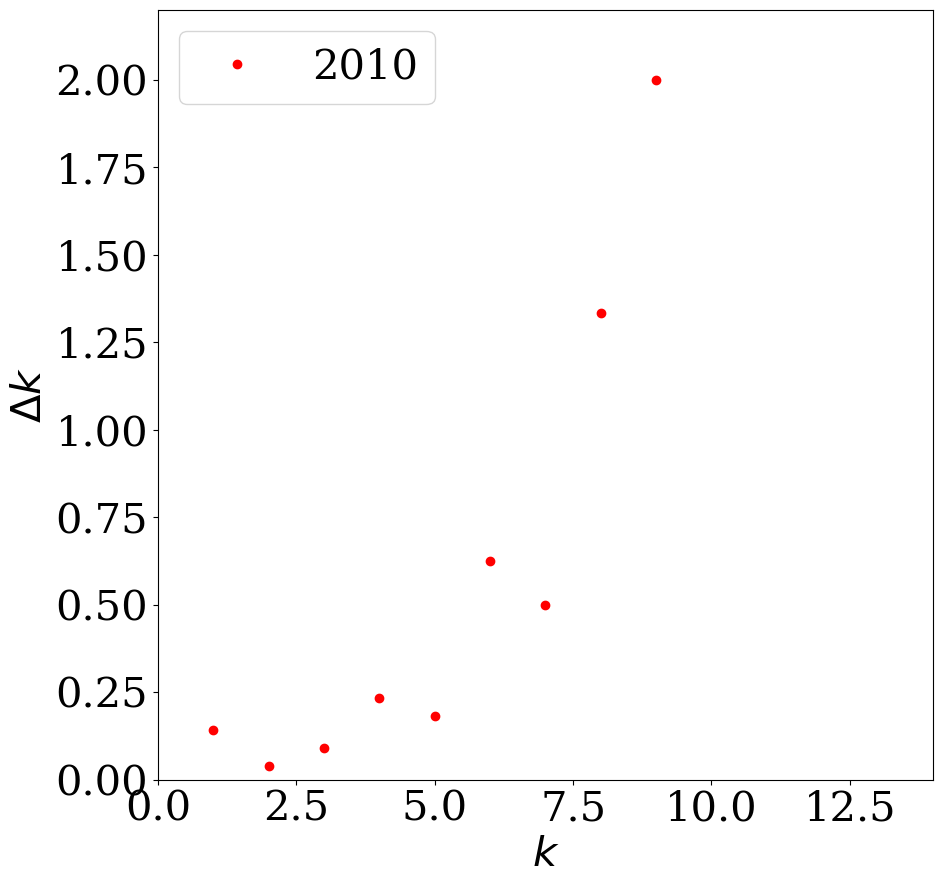

<Figure size 1000x1000 with 0 Axes>

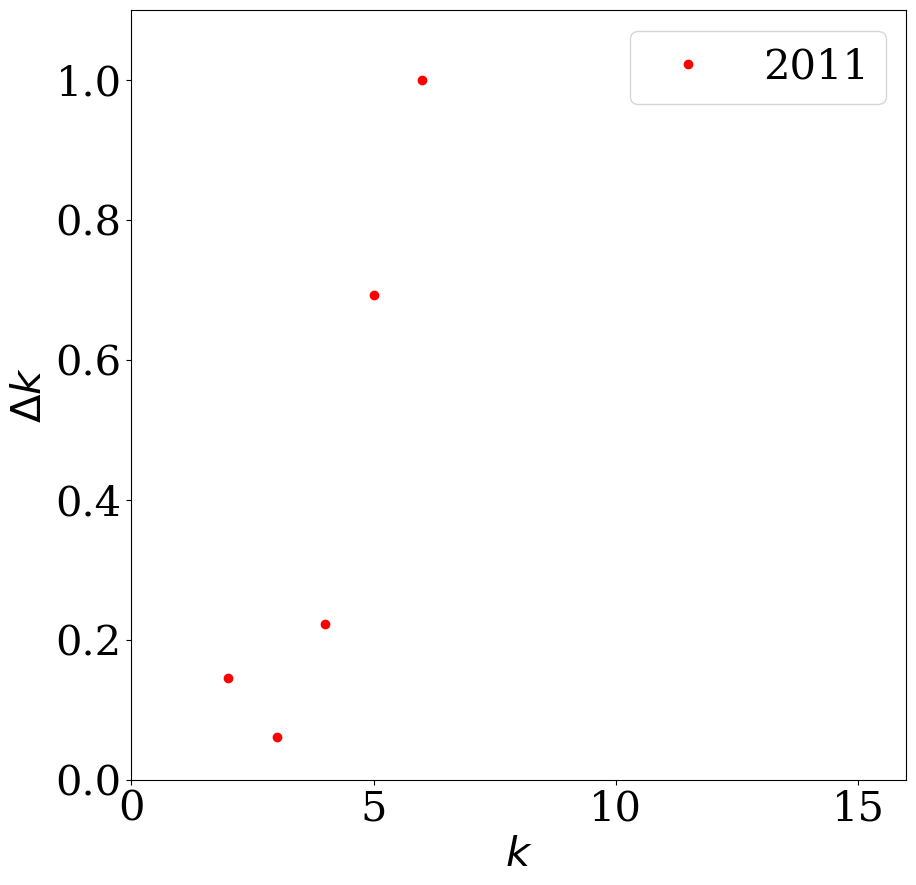

<Figure size 1000x1000 with 0 Axes>

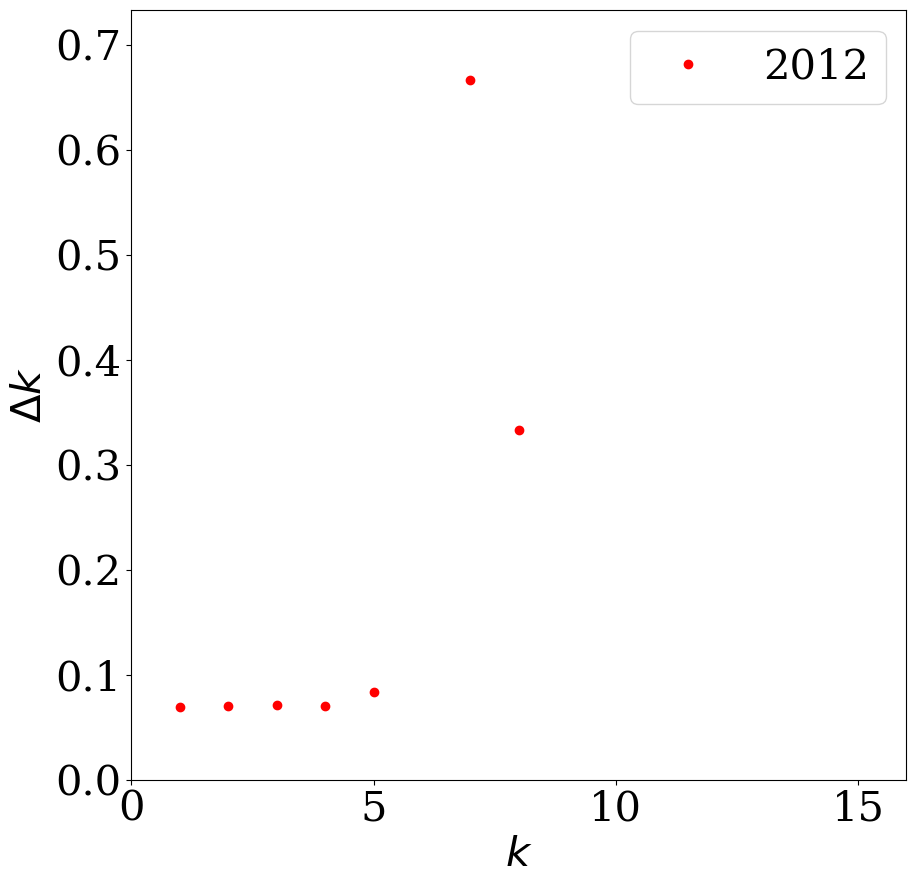

<Figure size 1000x1000 with 0 Axes>

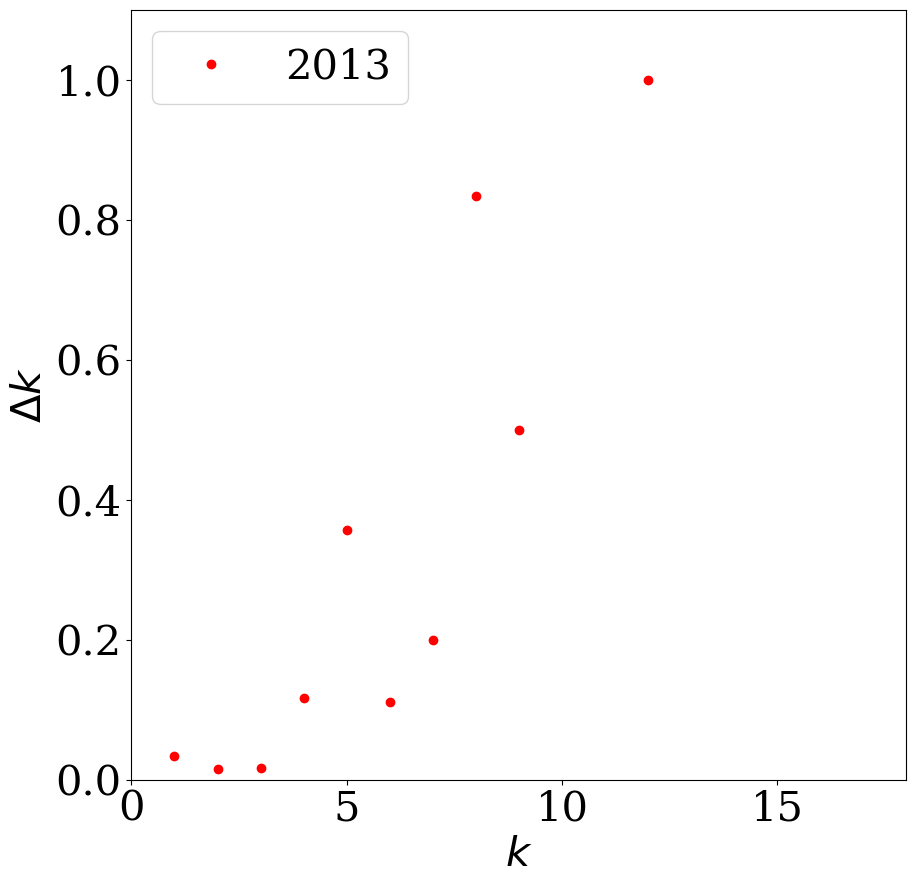

<Figure size 1000x1000 with 0 Axes>

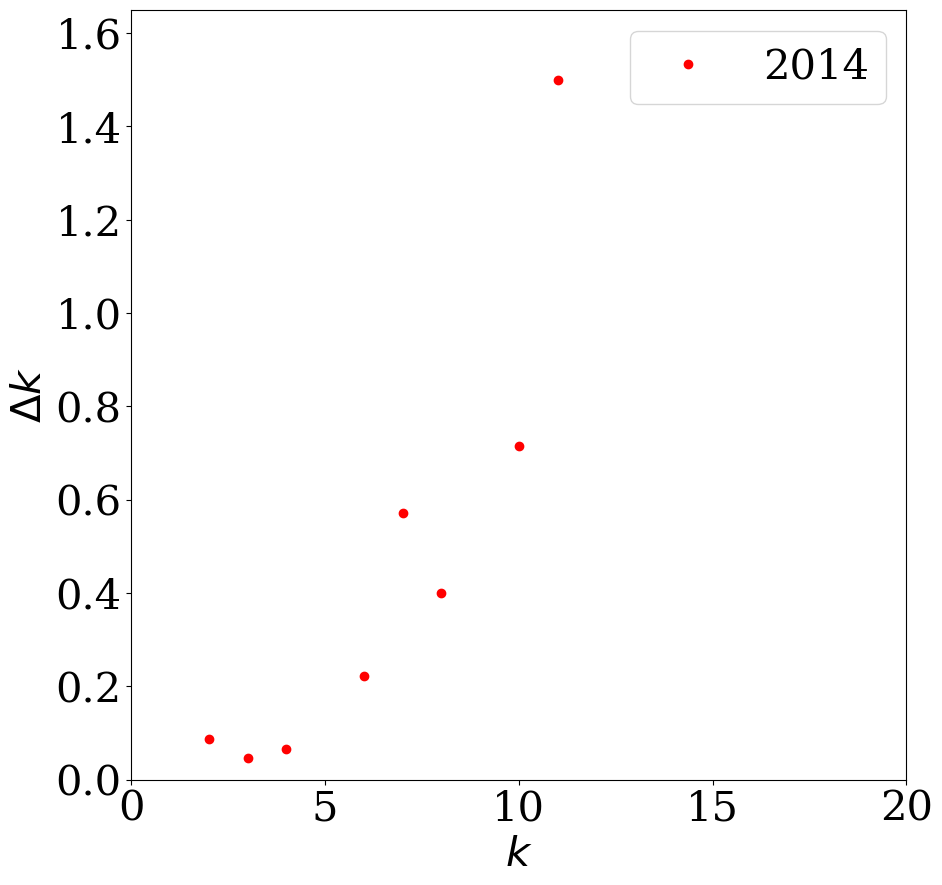

<Figure size 1000x1000 with 0 Axes>

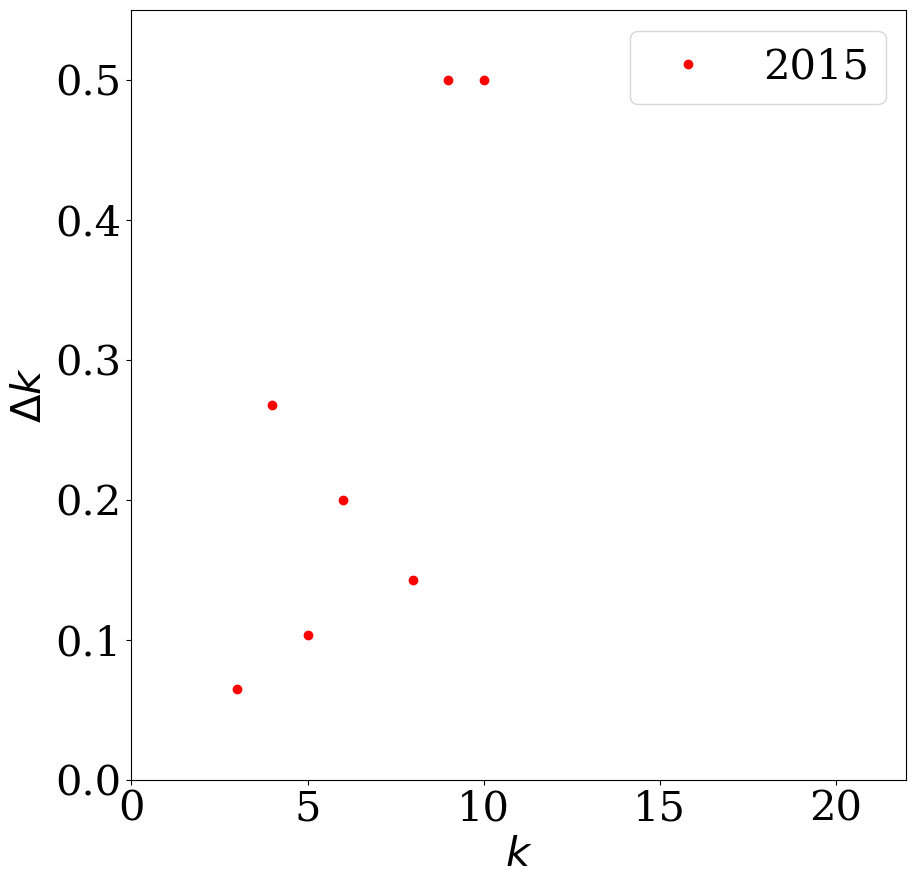

<Figure size 1000x1000 with 0 Axes>

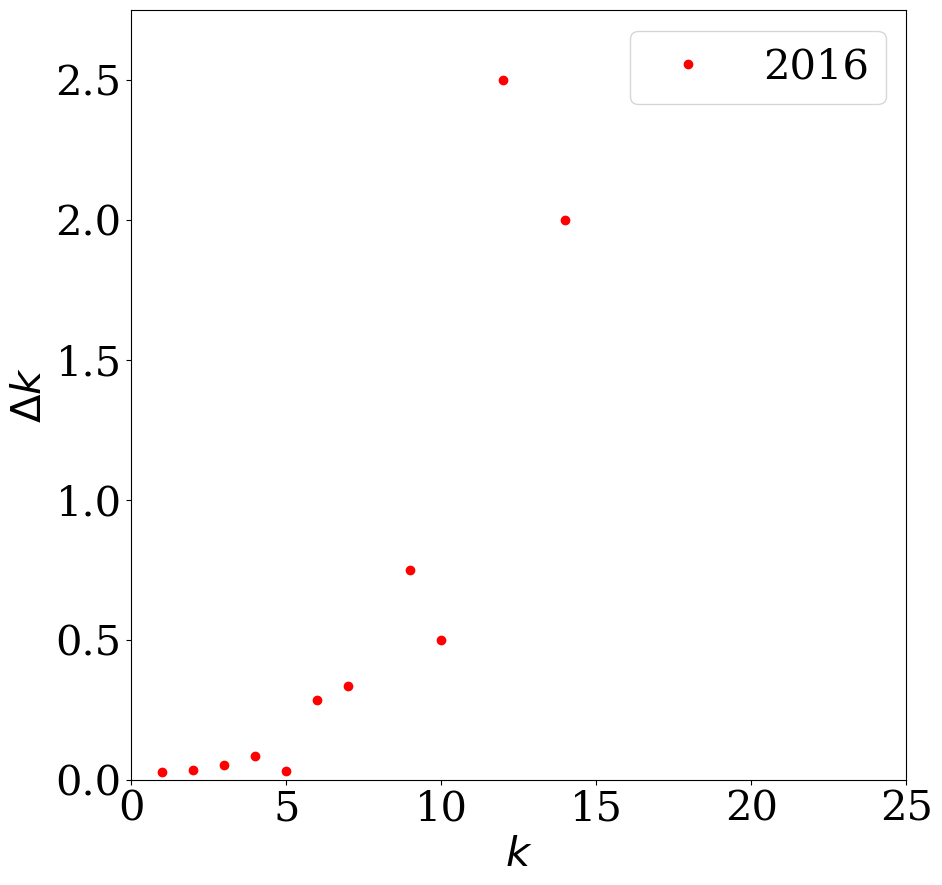

<Figure size 1000x1000 with 0 Axes>

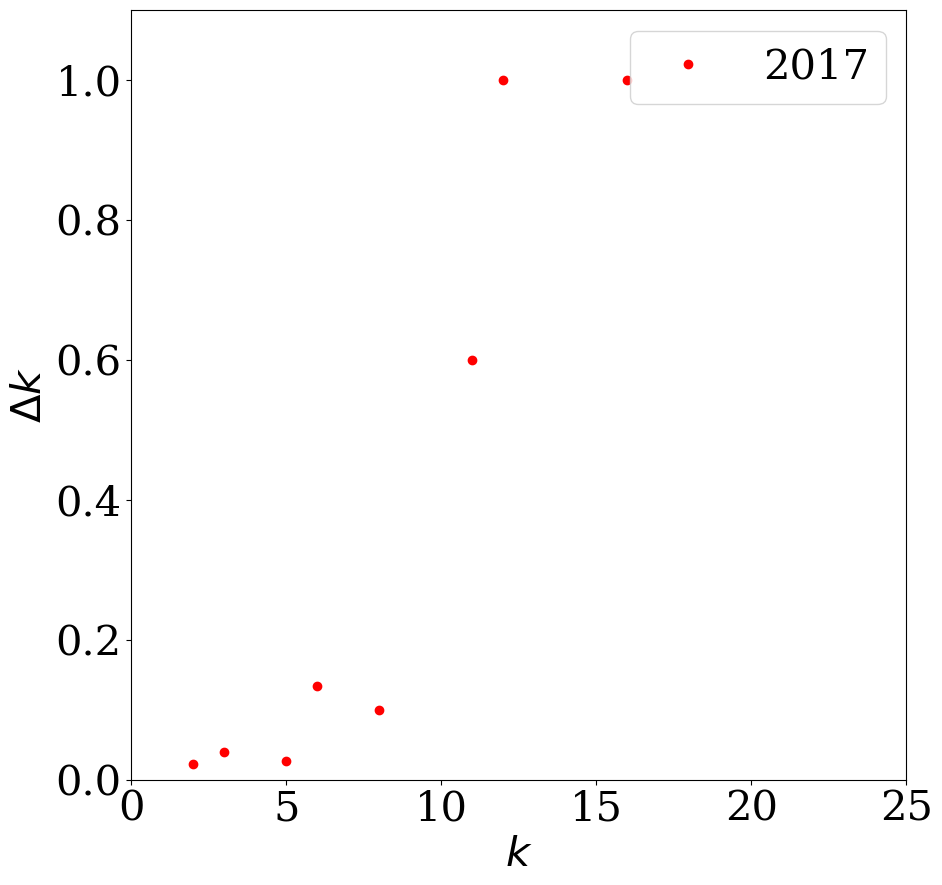

<Figure size 1000x1000 with 0 Axes>

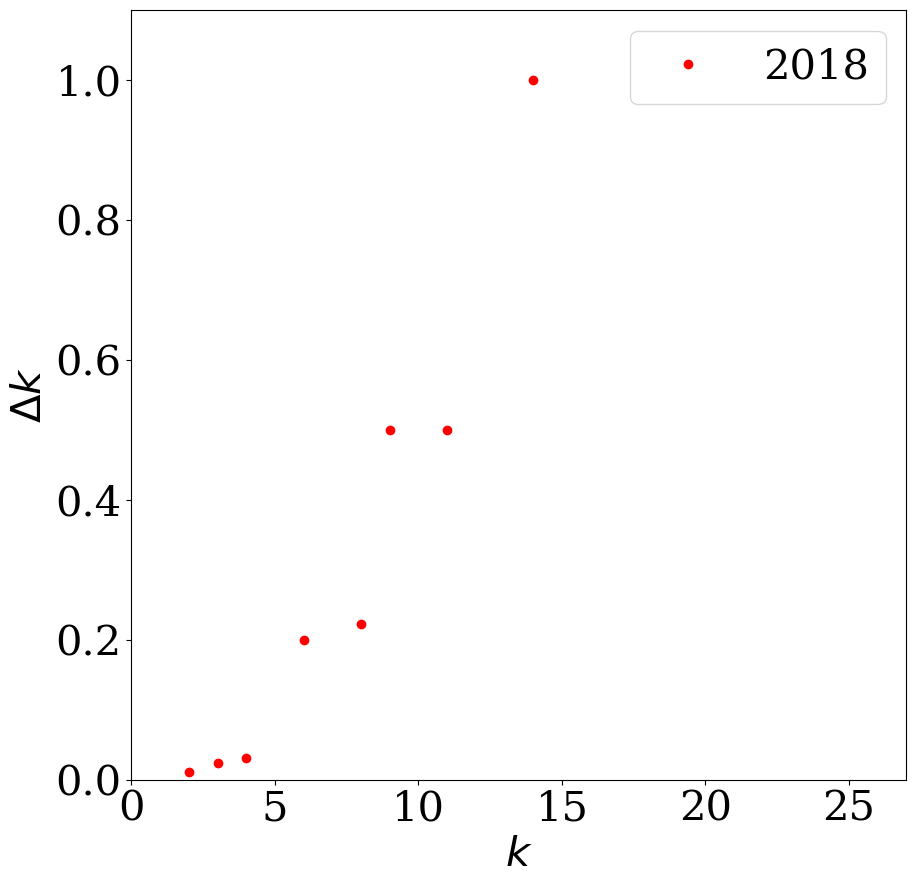

<Figure size 1000x1000 with 0 Axes>

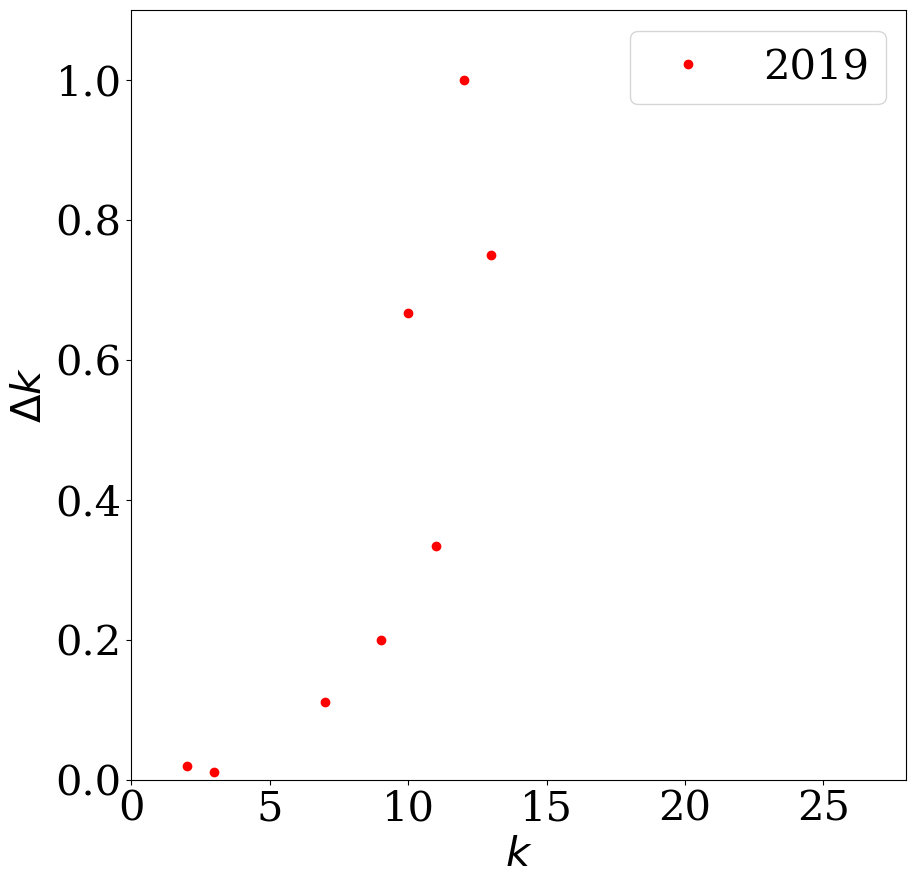

<Figure size 1000x1000 with 0 Axes>

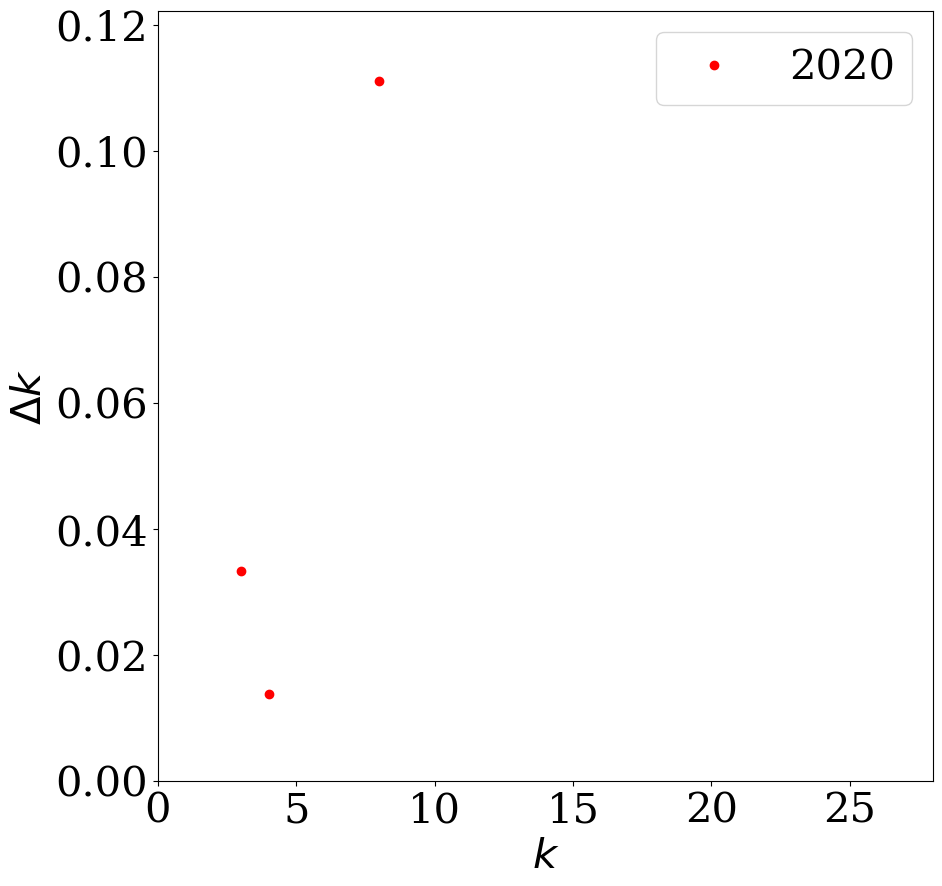

<Figure size 1000x1000 with 0 Axes>

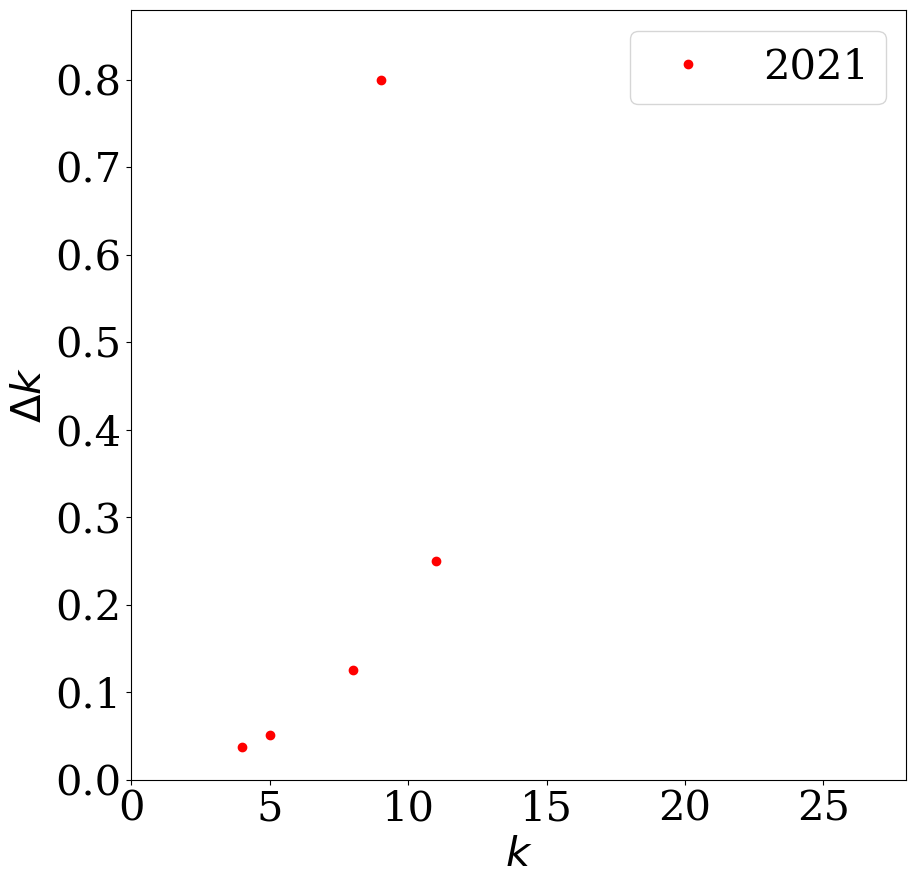

<Figure size 1000x1000 with 0 Axes>

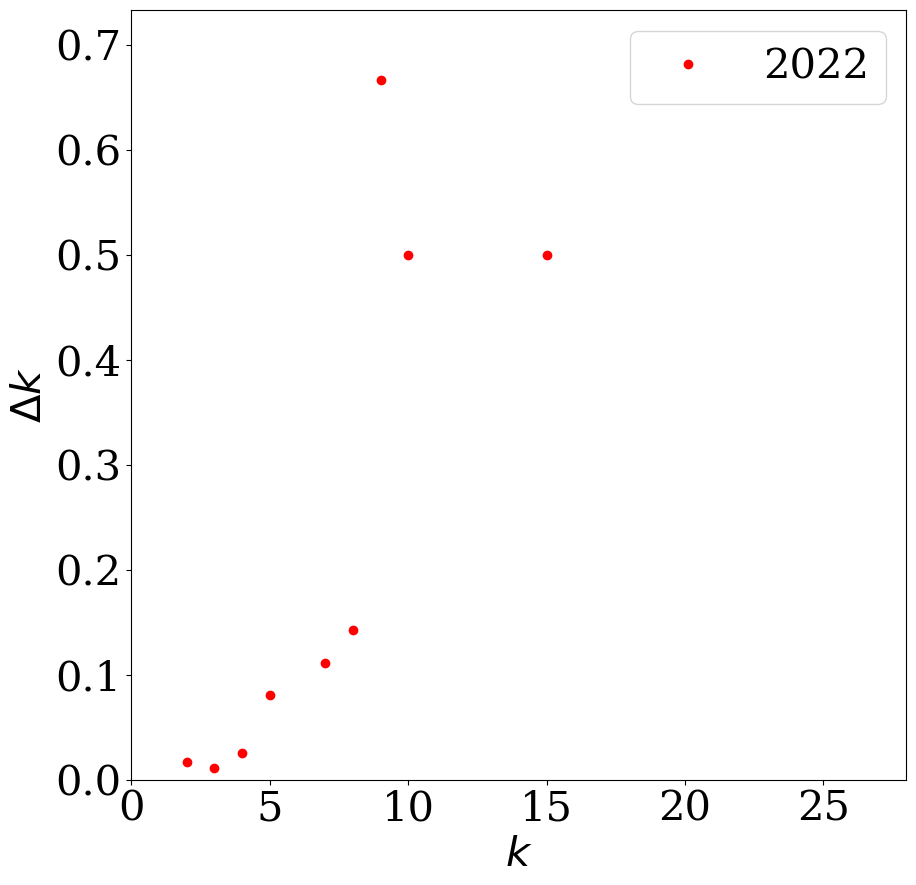

In [15]:
def max_x(x):
        if x[-1] <= 0:
            return max_x(x[:-1])
        return len(x)

for year in years[1:]:
    plt.rc('font', size=30)
    plt.figure(figsize=(10,10))
    x = dcfs_attachments[year][0]
    y = dcfs_attachments[year][1]
    plt.figure(figsize=(10,10))
    plt.plot(x,y,'or',label=year)
    plt.axis((0,max_x(x)+1,0,max(y)+max(y)/10))
    plt.xlabel(f'$k$')
    plt.ylabel(f'$\Delta k$')
    plt.legend()
    plt.savefig('../../Figures/dcfs_attachment_'+str(year)+'.png')

## Internal nodes

### CIAA

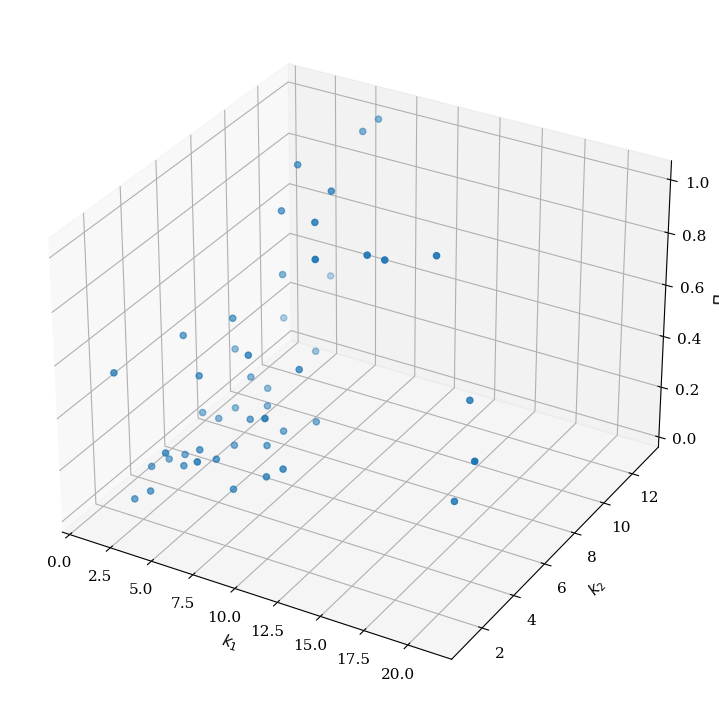

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

years = [i for i in range(1996,2023) if i != 2020]
D = {}
N = {}
Pi = {}
ciaa_intern_attachments = {}
for year in years[1:]:
    present = ciaa_graphs[year]
    if year-1 != 2020: previous = ciaa_graphs[year-1]
    else: previous = ciaa_graphs[2019]
    old_nodes = set(list(previous.nodes()))
    couples = []
    couples = [(present.degree(edge[0]),present.degree(edge[1])) for edge in present.edges()]
    d = {pair: couples.count(pair) for pair in set(couples)}
    new_edges = [edge for edge in present.edges() if edge not in previous.edges() and edge[0] in old_nodes and edge[1] in old_nodes]
    couples_new = [(present.degree(edge[0]),present.degree(edge[1])) for edge in new_edges]
    n = {pair: couples_new.count(pair) for pair in set(couples_new)}
    pi = {pair: n[pair]/d[pair] for pair in n.keys()}
    D[year] = d
    N[year] = n
    Pi[year] = pi

plt.rc('font', size=11)
plt.rcParams['font.family'] = 'serif'

all_keys = []
for entry in Pi.values():
    for key in entry.keys():
        all_keys.append(key)
all_keys = set(all_keys)
data_dict = {}
for key in all_keys:
    s = 0
    c = 0
    for entry in Pi.values():
        if key in entry:
            s  += entry[key]
            c += 1
    data_dict[key] = s/c
    

# Extracting the x, y, and z values from the data_dict
x_coords, y_coords = zip(*data_dict.keys())
z_coords = list(data_dict.values())

# Create a 3D scatter plot
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x_coords, y_coords, z_coords)

# Set axis labels
ax.set_xlabel(f'$k_1$')
ax.set_ylabel(f'$k_2$')
ax.set_zlabel(f'$\Pi$')

# Show the plot
plt.savefig('../../Figures/ciaa_attachment_internal.png',bbox_inches='tight')
            

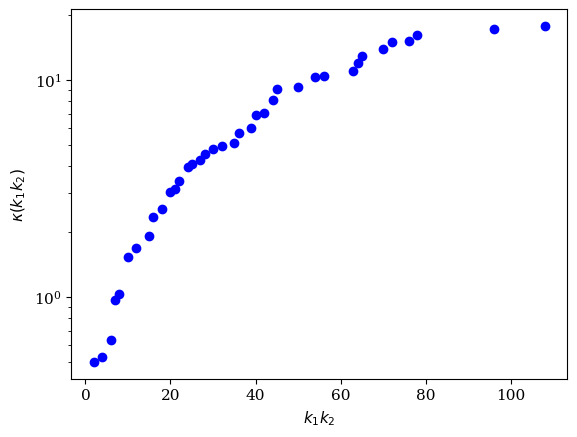

In [17]:
product_dict = {key[0]*key[1]: data_dict[key] for key in data_dict.keys()}

sorted_values = [value for key, value in sorted(data_dict.items())]

keys = sorted(product_dict.keys())

kappa = {}
for i in range(len(keys)):
    res = 0
    for j in range(i+1):
        res += product_dict[keys[j]]
    kappa[keys[i]] = res

# Extract keys (x-axis) and values (y-axis)
x_coords, y_coords = zip(*kappa.items())
x1 = x_coords
y1 = y_coords
# Create a log-scale plot
plt.yscale('log')
#plt.semilogy(x_coords, y_coords, marker='o', linestyle='-', color='b', label='Data Points')
plt.plot(x_coords,y_coords,'ob')

# Set labels and title
plt.xlabel(f'$k_1k_2$')
plt.ylabel(f'$\kappa(k_1k_2)$')
#plt.legend()

# Show the plot
plt.savefig('../../Figures/ciaa_internal_attachment_cumulated.png',bbox_inches='tight')

### DCFS

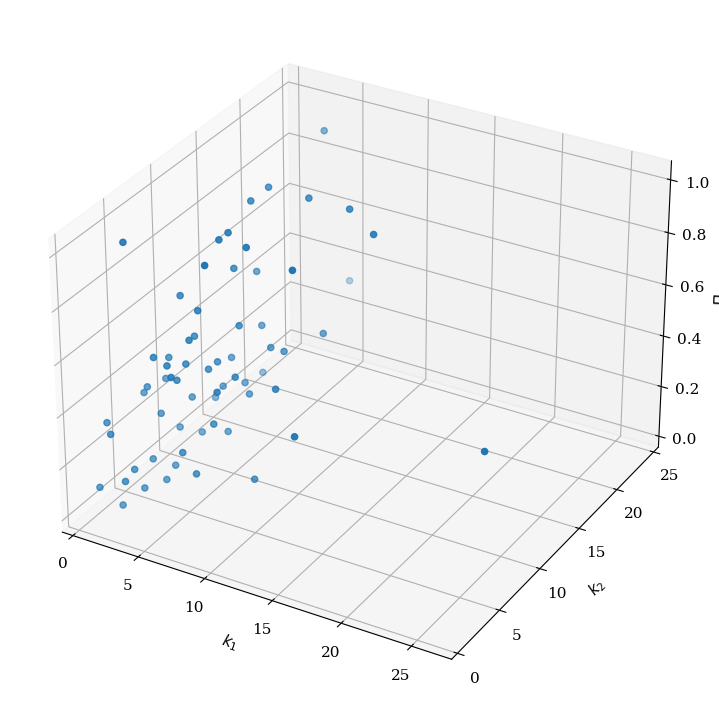

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

years = [i for i in range(2001,2023)]
D = {}
N = {}
Pi = {}
for year in years[1:]:
    present = dcfs_graphs[year]
    previous = dcfs_graphs[year-1]
    old_nodes = set(list(previous.nodes()))
    couples = []
    couples = [(present.degree(edge[0]),present.degree(edge[1])) for edge in present.edges()]
    d = {pair: couples.count(pair) for pair in set(couples)}
    new_edges = [edge for edge in present.edges() if edge not in previous.edges() and edge[0] in old_nodes and edge[1] in old_nodes]
    couples_new = [(present.degree(edge[0]),present.degree(edge[1])) for edge in new_edges]
    n = {pair: couples_new.count(pair) for pair in set(couples_new)}
    pi = {pair: n[pair]/d[pair] for pair in n.keys()}
    D[year] = d
    N[year] = n
    Pi[year] = pi

plt.rc('font', size=11)

all_keys = []
for entry in Pi.values():
    for key in entry.keys():
        all_keys.append(key)
all_keys = set(all_keys)
data_dict = {}
for key in all_keys:
    s = 0
    c = 0
    for entry in Pi.values():
        if key in entry:
            s  += entry[key]
            c += 1
    data_dict[key] = s/c
    

# Extracting the x, y, and z values from the data_dict
x_coords, y_coords = zip(*data_dict.keys())
z_coords = list(data_dict.values())

# Create a 3D scatter plot
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x_coords, y_coords, z_coords)

# Set axis labels
ax.set_xlabel(f'$k_1$')
ax.set_ylabel(f'$k_2$')
ax.set_zlabel(f'$\Pi$')

# Show the plot
plt.savefig('../../Figures/dcfs_attachment_internal.png',bbox_inches='tight')
            

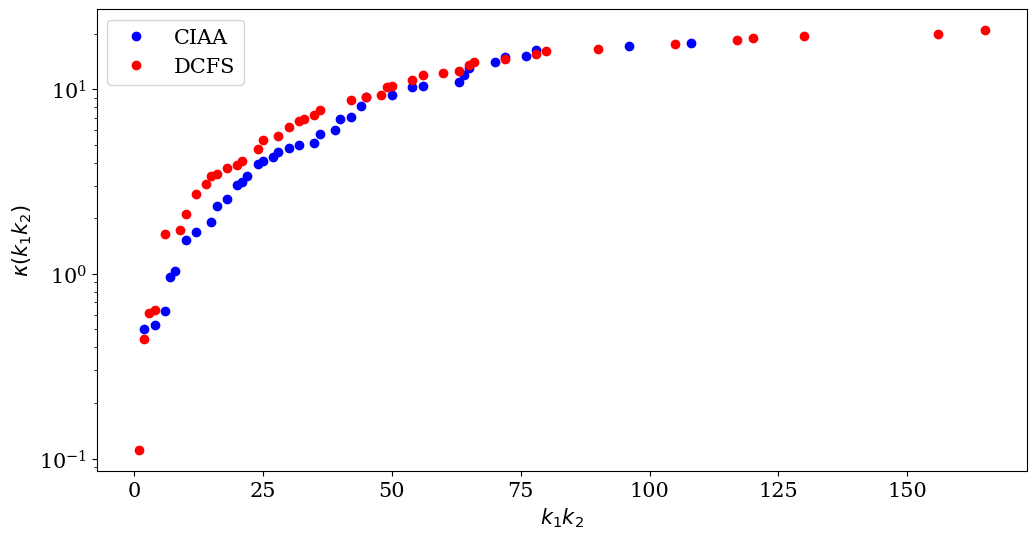

In [21]:
plt.rcParams['font.family'] = 'serif'
plt.rc('font', size=15)
plt.figure(figsize=(12,6))
product_dict = {key[0]*key[1]: data_dict[key] for key in data_dict.keys()}

sorted_values = [value for key, value in sorted(data_dict.items())]

keys = sorted(product_dict.keys())

kappa = {}
for i in range(len(keys)):
    res = 0
    for j in range(i+1):
        res += product_dict[keys[j]]
    kappa[keys[i]] = res

# Extract keys (x-axis) and values (y-axis)
x_coords, y_coords = zip(*kappa.items())
x = np.linspace(0,150,150)
y = [2**(i/100) for i in x]

# Create a log-scale plot
plt.yscale('log')
#plt.semilogy(x_coords, y_coords, marker='o', linestyle='-', color='b', label='Data Points')
plt.plot(x1,y1,'ob',label='CIAA')
plt.plot(x_coords,y_coords,'or',label='DCFS')
#plt.plot(x,y,'-r',label='Absence of preferential attachment')

# Set labels and title
plt.xlabel(f'$k_1k_2$')
plt.ylabel(f'$\kappa(k_1k_2)$')
plt.legend()

# Show the plot
plt.savefig('../../Figures/internal_attachment_cumulated.png',bbox_inches='tight')

### Similarity Measurement

In [20]:
ciaa_edges = list(ciaa_graphs[2022].edges())
dcfs_edges = list(dcfs_graphs[2022].edges())
with open('../data/raw/ciaa_2022.txt','w') as f:
    for edge in ciaa_edges:
        f.write(edge[0]+' '+edge[1]+'\n')
with open('../data/raw/dcfs_2022.txt','w') as f:
    for edge in dcfs_edges:
        f.write(edge[0]+' '+edge[1]+'\n')